In [ ]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import os
import PIL
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
import random

In [ ]:
# Load MNIST dataset-
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


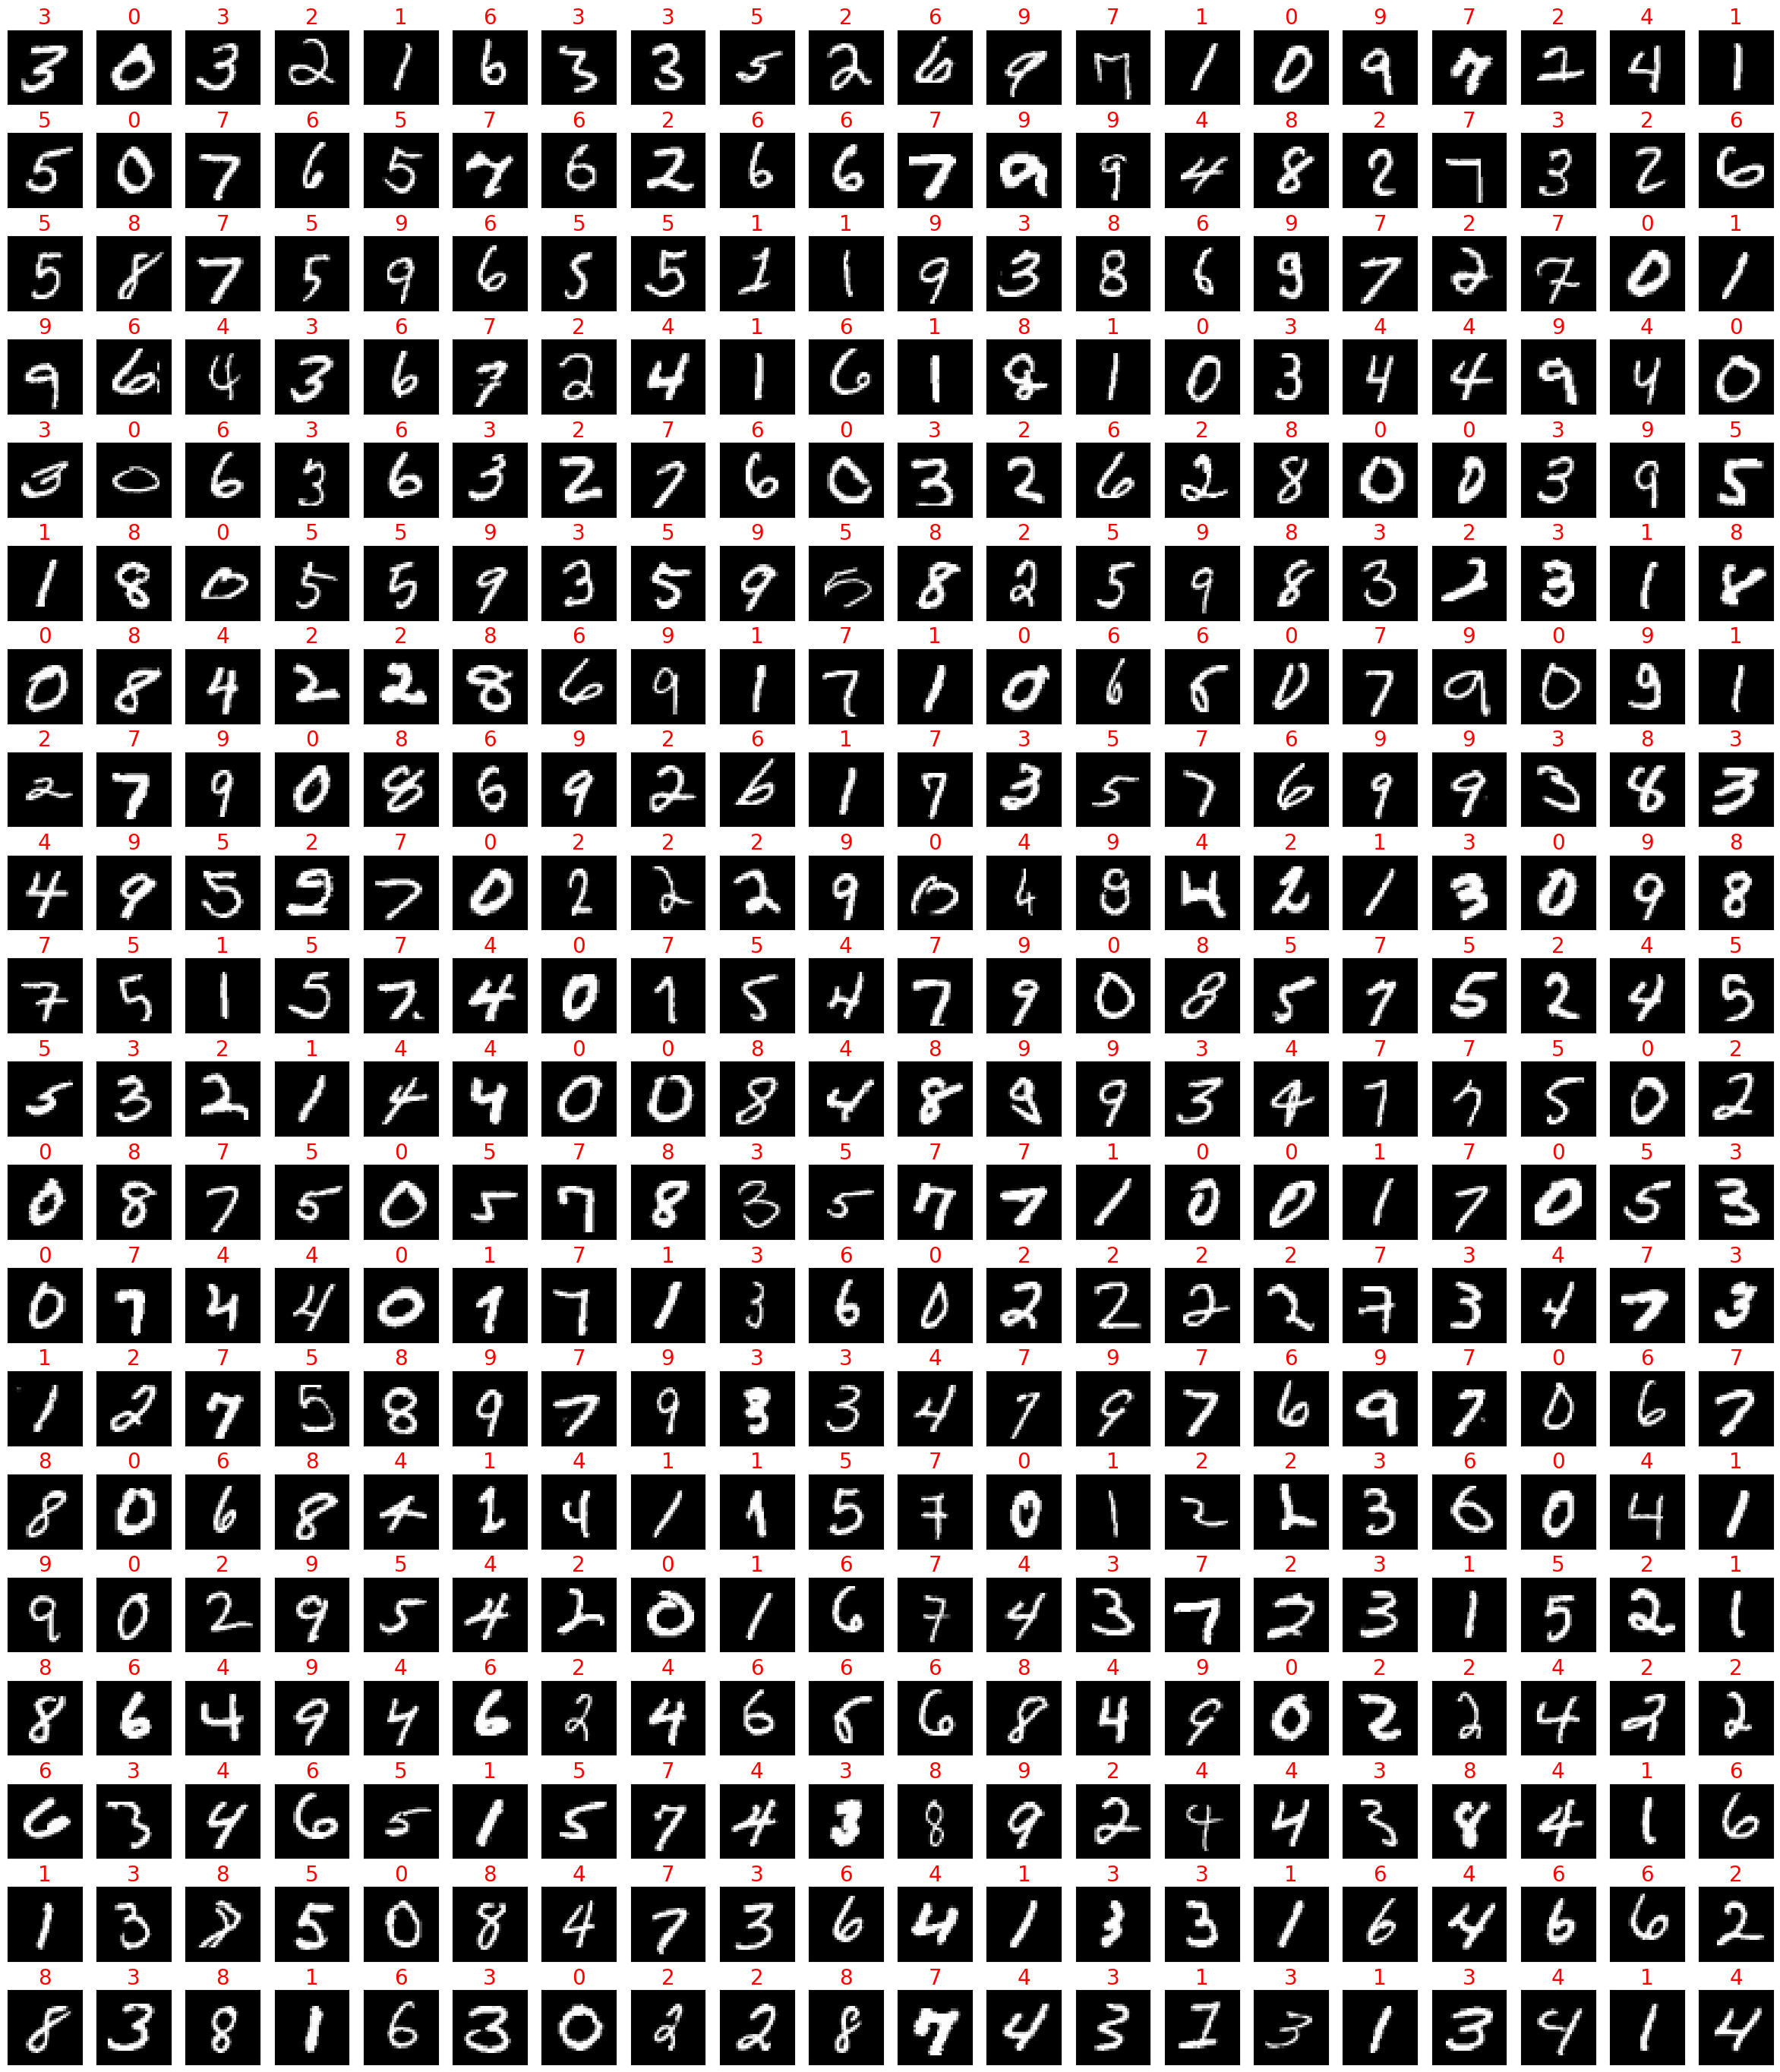

In [ ]:
def show_images():
    array=np.random.randint(low=1,high=10000,size=400)
    fig=plt.figure(figsize=(30,35))
    for i in range(400):
        fig.add_subplot(20,20,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.title(y_train[array[i]],color='red',fontsize=20)
        plt.imshow(X_train_padded[array[i]],cmap="gray")
show_images()

In [ ]:
X_train=np.dstack([X_train] * 3)
X_test=np.dstack([X_test]*3)
X_train.shape,X_test.shape

((60000, 28, 84), (10000, 28, 84))

In [ ]:
X_train = X_train.reshape(-1, 28,28,3)
X_test= X_test.reshape (-1,28,28,3)
X_train.shape,X_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [ ]:
X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_train])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in X_test])
#train_x = preprocess_input(x)
X_train.shape, X_test.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [ ]:
class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(class_names)

val_class_names =['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(val_class_names)

test_class_names=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
print(test_class_names)

# Function to know the name of the element

def Get_Element_Name(argument):
    switcher = {
        0: "Zero",
        1: "One",
        2: "Two",
        3: "Three",
        4: "Four",
        5: "Five",
        6: "Six",
        7: "Seven",
        8: "Eight",
        9: "Nine",
    }
    return switcher.get(argument, "Invalid")

print(Get_Element_Name(0))

['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
Zero


In [ ]:
# Preparing data

x=[] # to store array value of the images
x=X_train
y=[] # to store the labels of the images
y=y_train

test_images=[]
test_images=X_test
test_images_Original=[]
test_images_Original=X_test
test_image_label=[] # to store the labels of the images
test_image_label=y_test

val_images=[]
val_images=X_test
val_images_Original=[]
val_images_Original=X_test
val_image_label=[] # to store the labels of the images
val_image_label=y_test # to store the labels of the images

print("Preparing Dataset Completed.")

Preparing Dataset Completed.


In [ ]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)

# Test Dataset
print("Test Dataset")

test_images=np.array(test_images)
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images)
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(60000, 48, 48, 3)
(60000, 10)
Test Dataset
(10000, 48, 48, 3)
(10000, 10)
Validation Dataset
(10000, 48, 48, 3)
(10000, 10)


In [ ]:
# Check properties of the model that we are going to use for Transfer Learning

print("Summary of default VGG16 model.\n")

# we are using VGG16 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import VGG16

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_vgg16=VGG16(weights='imagenet')

# display the summary to see the properties of the model
model_vgg16.summary()

Summary of default VGG16 model.

553467096/553467096 [==============================] - 12s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                          

In [ ]:
# Modelling WITH Transfer Learning

# Here we will prepare model as per our requirements

print("Summary of Custom VGG16 model.\n")
print("1) We setup input layer and 2) We removed top (last) layer. \n")

# let us prepare our input_layer to pass our image size. default is (224,224,3). we will change it to (224,224,3)
input_layer=layers.Input(shape=(48,48,3))

# initialize the transfer model VGG16 with appropriate properties per our need.
# we are passing paramers as following
# 1) weights='imagenet' - Using this we are carring weights as of original weights.
# 2) input_tensor to pass the VGG16 using input_tensor
# 3) we want to change the last layer so we are not including top layer
model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
model_vgg16.summary()

Summary of Custom VGG16 model.

1) We setup input layer and 2) We removed top (last) layer. 

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None

In [ ]:
# access the current last layer of the model and add flatten and dense after it

print("Summary of Custom VGG16 model.\n")
print("1) We flatten the last layer and added 1 Dense layer and 1 output layer.\n")

last_layer=model_vgg16.output # we are taking last layer of the model

# Add flatten layer: we are extending Neural Network by adding flattn layer
flatten=layers.Flatten()(last_layer)

# Add dense layer
dense1=layers.Dense(100,activation='relu')(flatten)
dense1=layers.Dense(100,activation='relu')(flatten)
dense1=layers.Dense(100,activation='relu')(flatten)


# Add dense layer to the final output layer
output_layer=layers.Dense(10,activation='softmax')(flatten)

# Creating modle with input and output layer
model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
model.summary()

Summary of Custom VGG16 model.

1) We flatten the last layer and added 1 Dense layer and 1 output layer.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                     

In [ ]:
# we will freez all the layers except the last layer

# we are making all the layers intrainable except the last layer
print("We are making all the layers intrainable except the last layer. \n")
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

We are making all the layers intrainable except the last layer. 

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                             

In [ ]:
# Train the Model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)
# print(xtrain)
# print(xtest)
# print(ytrain)
# print(ytest)

print("Splitting data for train and test completed.")

Splitting data for train and test completed.


In [ ]:
# Compiling Model

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")
model.summary()

Model compilation completed.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (No

In [ ]:
# Fit the Model

# xtrain2=xtrain.reshape(60000,48,48,3)
# xtest2=xtest.reshape(10000,48,48,3)

history = model.fit(X_train,y_train,epochs=5,batch_size=128,verbose=True,validation_data=(X_test,y_test))

print("Fitting the model completed.")

Epoch 1/5
375/375 [==============================] - 1675s 4s/step - loss: 1.4351 - accuracy: 0.7540 - val_loss: 0.5603 - val_accuracy: 0.8650
Epoch 2/5
375/375 [==============================] - 1673s 4s/step - loss: 0.4574 - accuracy: 0.8812 - val_loss: 0.4141 - val_accuracy: 0.8896
Epoch 3/5
375/375 [==============================] - 1673s 4s/step - loss: 0.3408 - accuracy: 0.9042 - val_loss: 0.3230 - val_accuracy: 0.9108
Epoch 4/5
375/375 [==============================] - 1671s 4s/step - loss: 0.2902 - accuracy: 0.9152 - val_loss: 0.3099 - val_accuracy: 0.9133
Epoch 5/5
375/375 [==============================] - 1611s 4s/step - loss: 0.2659 - accuracy: 0.9198 - val_loss: 0.2902 - val_accuracy: 0.9130
Fitting the model completed.


In [ ]:
# This function helps to predict individual image supplied to it

# Function 1

def predict(img_name):
    img=image.load_img(img_name,target_size=(48,48))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)

    prediction=model.predict(img.reshape(1,48,48,3))
    output=np.argmax(prediction)

    print(class_names[output] + ": " + Get_Element_Name(class_names[output]))


# Function 2

# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array

    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.astype('int32'))

    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour

    plt.xlabel("{} {:2.0f}% \n ({})".format(Get_Element_Name(predicted_label),
                                            100*np.max(predictions_array), Get_Element_Name(true_label),
                                            color=color, horizontalalignment='left'))


#     plt.xlabel("{} {:2.0f}% ({})".format(val_class_names[predicted_label],
#                                          100*np.max(predictions_array), val_class_names[true_label]),
#                                          color=color)


# Function 3

# This function plots bar chart supplied in the array data
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1

    thisplot=plt.bar(range(10), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [ ]:
# Preparing prediction arrary
predictions=[]

for img in tqdm(val_images):
    img=img.reshape(1,48,48,3)
    predictions.append(model.predict(img))

1/1 [==============================] - 0s 90ms/step


 91%|█████████ | 9088/10000 [27:00<02:27,  6.20it/s]

1/1 [==============================] - 0s 94ms/step


 91%|█████████ | 9089/10000 [27:00<02:28,  6.15it/s]

1/1 [==============================] - 0s 94ms/step


 91%|█████████ | 9090/10000 [27:00<02:30,  6.06it/s]

1/1 [==============================] - 0s 92ms/step


 91%|█████████ | 9091/10000 [27:00<02:30,  6.04it/s]

1/1 [==============================] - 0s 88ms/step


 91%|█████████ | 9092/10000 [27:01<02:25,  6.23it/s]

1/1 [==============================] - 0s 108ms/step


 91%|█████████ | 9093/10000 [27:01<02:29,  6.05it/s]

1/1 [==============================] - 0s 92ms/step


 91%|█████████ | 9094/10000 [27:01<02:36,  5.79it/s]

1/1 [==============================] - 0s 97ms/step


 91%|█████████ | 9095/10000 [27:01<02:34,  5.86it/s]

1/1 [==============================] - 0s 90ms/step


 91%|█████████ | 9096/10000 [27:01<02:34,  5.84it/s]

1/1 [==============================] - 0s 112ms/step


 91%|█████████ | 9097/10000 [27:01<02:39,  5.65it/s]

1/1 [==============================] - 0s 114ms/step


 91%|█████████ | 9098/10000 [27:02<02:45,  5.45it/s]

1/1 [==============================] - 0s 165ms/step


 91%|█████████ | 9099/10000 [27:02<03:13,  4.67it/s]

1/1 [==============================] - 0s 129ms/step


 91%|█████████ | 9100/10000 [27:02<03:18,  4.54it/s]

1/1 [==============================] - 0s 134ms/step


 91%|█████████ | 9101/10000 [27:02<03:18,  4.52it/s]

1/1 [==============================] - 0s 90ms/step


 91%|█████████ | 9102/10000 [27:03<03:05,  4.85it/s]

1/1 [==============================] - 0s 149ms/step


 91%|█████████ | 9103/10000 [27:03<03:17,  4.55it/s]

1/1 [==============================] - 0s 166ms/step


 91%|█████████ | 9104/10000 [27:03<04:05,  3.65it/s]

1/1 [==============================] - 0s 150ms/step


 91%|█████████ | 9105/10000 [27:04<04:26,  3.36it/s]

1/1 [==============================] - 0s 113ms/step


 91%|█████████ | 9106/10000 [27:04<04:03,  3.67it/s]

1/1 [==============================] - 0s 134ms/step


 91%|█████████ | 9107/10000 [27:04<03:54,  3.81it/s]

1/1 [==============================] - 0s 122ms/step


 91%|█████████ | 9108/10000 [27:04<03:38,  4.09it/s]

1/1 [==============================] - 0s 128ms/step


 91%|█████████ | 9109/10000 [27:04<03:31,  4.20it/s]

1/1 [==============================] - 0s 125ms/step


 91%|█████████ | 9110/10000 [27:05<03:24,  4.34it/s]

1/1 [==============================] - 0s 118ms/step


 91%|█████████ | 9111/10000 [27:05<03:23,  4.38it/s]

1/1 [==============================] - 0s 93ms/step


 91%|█████████ | 9112/10000 [27:05<03:12,  4.61it/s]

1/1 [==============================] - 0s 111ms/step


 91%|█████████ | 9113/10000 [27:05<03:06,  4.76it/s]

1/1 [==============================] - 0s 137ms/step


 91%|█████████ | 9114/10000 [27:05<03:09,  4.68it/s]

1/1 [==============================] - 0s 149ms/step


 91%|█████████ | 9115/10000 [27:06<03:18,  4.47it/s]

1/1 [==============================] - 0s 135ms/step


 91%|█████████ | 9116/10000 [27:06<03:24,  4.33it/s]

1/1 [==============================] - 0s 109ms/step


 91%|█████████ | 9117/10000 [27:06<03:14,  4.55it/s]

1/1 [==============================] - 0s 98ms/step


 91%|█████████ | 9118/10000 [27:06<03:00,  4.88it/s]

1/1 [==============================] - 0s 121ms/step


 91%|█████████ | 9119/10000 [27:07<03:16,  4.49it/s]

1/1 [==============================] - 0s 108ms/step


 91%|█████████ | 9120/10000 [27:07<03:02,  4.83it/s]

1/1 [==============================] - 0s 91ms/step


 91%|█████████ | 9121/10000 [27:07<02:52,  5.09it/s]

1/1 [==============================] - 0s 122ms/step


 91%|█████████ | 9122/10000 [27:07<02:48,  5.21it/s]

1/1 [==============================] - 0s 88ms/step


 91%|█████████ | 9123/10000 [27:07<02:38,  5.52it/s]

1/1 [==============================] - 0s 84ms/step


 91%|█████████ | 9124/10000 [27:07<02:30,  5.83it/s]

1/1 [==============================] - 0s 94ms/step


 91%|█████████▏| 9125/10000 [27:08<02:24,  6.05it/s]

1/1 [==============================] - 0s 102ms/step


 91%|█████████▏| 9126/10000 [27:08<02:27,  5.94it/s]

1/1 [==============================] - 0s 91ms/step


 91%|█████████▏| 9127/10000 [27:08<02:23,  6.07it/s]

1/1 [==============================] - 0s 91ms/step


 91%|█████████▏| 9128/10000 [27:08<02:20,  6.20it/s]

1/1 [==============================] - 0s 101ms/step


 91%|█████████▏| 9129/10000 [27:08<02:19,  6.24it/s]

1/1 [==============================] - 0s 90ms/step


 91%|█████████▏| 9130/10000 [27:08<02:17,  6.35it/s]

1/1 [==============================] - 0s 88ms/step


 91%|█████████▏| 9131/10000 [27:09<02:14,  6.48it/s]

1/1 [==============================] - 0s 91ms/step


 91%|█████████▏| 9132/10000 [27:09<02:23,  6.07it/s]

1/1 [==============================] - 0s 93ms/step


 91%|█████████▏| 9133/10000 [27:09<02:46,  5.22it/s]

1/1 [==============================] - 0s 94ms/step


 91%|█████████▏| 9134/10000 [27:09<02:36,  5.54it/s]

1/1 [==============================] - 0s 109ms/step


 91%|█████████▏| 9135/10000 [27:09<02:36,  5.53it/s]

1/1 [==============================] - 0s 90ms/step


 91%|█████████▏| 9136/10000 [27:09<02:29,  5.77it/s]

1/1 [==============================] - 0s 91ms/step


 91%|█████████▏| 9137/10000 [27:10<02:22,  6.04it/s]

1/1 [==============================] - 0s 90ms/step


 91%|█████████▏| 9138/10000 [27:10<02:19,  6.19it/s]

1/1 [==============================] - 0s 129ms/step


 91%|█████████▏| 9139/10000 [27:10<02:26,  5.86it/s]

1/1 [==============================] - 0s 94ms/step


 91%|█████████▏| 9140/10000 [27:10<02:23,  5.98it/s]

1/1 [==============================] - 0s 113ms/step


 91%|█████████▏| 9141/10000 [27:10<02:25,  5.90it/s]

1/1 [==============================] - 0s 89ms/step


 91%|█████████▏| 9142/10000 [27:10<02:24,  5.92it/s]

1/1 [==============================] - 0s 127ms/step


 91%|█████████▏| 9143/10000 [27:11<02:31,  5.66it/s]

1/1 [==============================] - 0s 93ms/step


 91%|█████████▏| 9144/10000 [27:11<02:29,  5.72it/s]

1/1 [==============================] - 0s 107ms/step


 91%|█████████▏| 9145/10000 [27:11<02:32,  5.59it/s]

1/1 [==============================] - 0s 90ms/step


 91%|█████████▏| 9146/10000 [27:11<02:26,  5.81it/s]

1/1 [==============================] - 0s 97ms/step


 91%|█████████▏| 9147/10000 [27:11<02:22,  5.97it/s]

1/1 [==============================] - 0s 87ms/step


 91%|█████████▏| 9148/10000 [27:11<02:19,  6.09it/s]

1/1 [==============================] - 0s 130ms/step


 91%|█████████▏| 9149/10000 [27:12<02:43,  5.19it/s]

1/1 [==============================] - 0s 88ms/step


 92%|█████████▏| 9150/10000 [27:12<02:37,  5.41it/s]

1/1 [==============================] - 0s 89ms/step


 92%|█████████▏| 9151/10000 [27:12<02:31,  5.59it/s]

1/1 [==============================] - 0s 119ms/step


 92%|█████████▏| 9152/10000 [27:12<02:32,  5.56it/s]

1/1 [==============================] - 0s 86ms/step


 92%|█████████▏| 9153/10000 [27:12<02:27,  5.73it/s]

1/1 [==============================] - 0s 110ms/step


 92%|█████████▏| 9154/10000 [27:13<02:27,  5.73it/s]

1/1 [==============================] - 0s 127ms/step


 92%|█████████▏| 9155/10000 [27:13<02:32,  5.56it/s]

1/1 [==============================] - 0s 101ms/step


 92%|█████████▏| 9156/10000 [27:13<02:34,  5.48it/s]

1/1 [==============================] - 0s 97ms/step


 92%|█████████▏| 9157/10000 [27:13<02:29,  5.65it/s]

1/1 [==============================] - 0s 95ms/step


 92%|█████████▏| 9158/10000 [27:13<02:24,  5.81it/s]

1/1 [==============================] - 0s 93ms/step


 92%|█████████▏| 9159/10000 [27:13<02:21,  5.95it/s]

1/1 [==============================] - 0s 87ms/step


 92%|█████████▏| 9160/10000 [27:14<02:16,  6.17it/s]

1/1 [==============================] - 0s 92ms/step


 92%|█████████▏| 9161/10000 [27:14<02:13,  6.28it/s]

1/1 [==============================] - 0s 91ms/step


 92%|█████████▏| 9162/10000 [27:14<02:13,  6.28it/s]

1/1 [==============================] - 0s 113ms/step


 92%|█████████▏| 9163/10000 [27:14<02:19,  6.02it/s]

1/1 [==============================] - 0s 138ms/step


 92%|█████████▏| 9164/10000 [27:14<02:27,  5.67it/s]

1/1 [==============================] - 0s 92ms/step


 92%|█████████▏| 9165/10000 [27:14<02:21,  5.89it/s]

1/1 [==============================] - 0s 90ms/step


 92%|█████████▏| 9166/10000 [27:15<02:17,  6.05it/s]

1/1 [==============================] - 0s 89ms/step


 92%|█████████▏| 9167/10000 [27:15<02:17,  6.07it/s]

1/1 [==============================] - 0s 91ms/step


 92%|█████████▏| 9168/10000 [27:15<02:14,  6.18it/s]

1/1 [==============================] - 0s 96ms/step


 92%|█████████▏| 9169/10000 [27:15<02:22,  5.84it/s]

1/1 [==============================] - 0s 92ms/step


 92%|█████████▏| 9170/10000 [27:15<02:21,  5.87it/s]

1/1 [==============================] - 0s 104ms/step


 92%|█████████▏| 9171/10000 [27:16<02:36,  5.29it/s]

1/1 [==============================] - 0s 109ms/step


 92%|█████████▏| 9172/10000 [27:16<02:33,  5.40it/s]

1/1 [==============================] - 0s 91ms/step


 92%|█████████▏| 9173/10000 [27:16<02:27,  5.60it/s]

1/1 [==============================] - 0s 100ms/step


 92%|█████████▏| 9174/10000 [27:16<02:24,  5.73it/s]

1/1 [==============================] - 0s 103ms/step


 92%|█████████▏| 9175/10000 [27:16<02:24,  5.69it/s]

1/1 [==============================] - 0s 99ms/step


 92%|█████████▏| 9176/10000 [27:16<02:24,  5.70it/s]

1/1 [==============================] - 0s 94ms/step


 92%|█████████▏| 9177/10000 [27:17<02:23,  5.72it/s]

1/1 [==============================] - 0s 174ms/step


 92%|█████████▏| 9178/10000 [27:17<02:49,  4.84it/s]

1/1 [==============================] - 0s 124ms/step


 92%|█████████▏| 9179/10000 [27:17<03:01,  4.53it/s]

1/1 [==============================] - 0s 124ms/step


 92%|█████████▏| 9180/10000 [27:17<03:03,  4.47it/s]

1/1 [==============================] - 0s 92ms/step


 92%|█████████▏| 9181/10000 [27:17<02:52,  4.74it/s]

1/1 [==============================] - 0s 123ms/step


 92%|█████████▏| 9182/10000 [27:18<02:58,  4.58it/s]

1/1 [==============================] - 0s 102ms/step


 92%|█████████▏| 9183/10000 [27:18<02:53,  4.72it/s]

1/1 [==============================] - 0s 123ms/step


 92%|█████████▏| 9184/10000 [27:18<02:55,  4.65it/s]

1/1 [==============================] - 0s 134ms/step


 92%|█████████▏| 9185/10000 [27:18<02:57,  4.58it/s]

1/1 [==============================] - 0s 134ms/step


 92%|█████████▏| 9186/10000 [27:19<02:57,  4.59it/s]

1/1 [==============================] - 0s 90ms/step


 92%|█████████▏| 9187/10000 [27:19<02:45,  4.90it/s]

1/1 [==============================] - 0s 92ms/step


 92%|█████████▏| 9188/10000 [27:19<02:35,  5.24it/s]

1/1 [==============================] - 0s 168ms/step


 92%|█████████▏| 9189/10000 [27:19<02:46,  4.86it/s]

1/1 [==============================] - 0s 129ms/step


 92%|█████████▏| 9190/10000 [27:19<02:52,  4.70it/s]

1/1 [==============================] - 0s 91ms/step


 92%|█████████▏| 9191/10000 [27:20<02:43,  4.96it/s]

1/1 [==============================] - 0s 87ms/step


 92%|█████████▏| 9192/10000 [27:20<02:29,  5.41it/s]

1/1 [==============================] - 0s 123ms/step


 92%|█████████▏| 9193/10000 [27:20<02:29,  5.39it/s]

1/1 [==============================] - 0s 158ms/step


 92%|█████████▏| 9194/10000 [27:20<02:43,  4.92it/s]

1/1 [==============================] - 0s 139ms/step


 92%|█████████▏| 9195/10000 [27:20<02:54,  4.63it/s]

1/1 [==============================] - 0s 154ms/step


 92%|█████████▏| 9196/10000 [27:21<02:58,  4.51it/s]

1/1 [==============================] - 0s 98ms/step


 92%|█████████▏| 9197/10000 [27:21<02:51,  4.67it/s]

1/1 [==============================] - 0s 90ms/step


 92%|█████████▏| 9198/10000 [27:21<02:41,  4.98it/s]

1/1 [==============================] - 0s 92ms/step


 92%|█████████▏| 9199/10000 [27:21<02:29,  5.36it/s]

1/1 [==============================] - 0s 111ms/step


 92%|█████████▏| 9200/10000 [27:21<02:49,  4.73it/s]

1/1 [==============================] - 0s 124ms/step


 92%|█████████▏| 9201/10000 [27:22<02:43,  4.88it/s]

1/1 [==============================] - 0s 110ms/step


 92%|█████████▏| 9202/10000 [27:22<02:38,  5.05it/s]

1/1 [==============================] - 0s 87ms/step


 92%|█████████▏| 9203/10000 [27:22<02:24,  5.50it/s]

1/1 [==============================] - 0s 102ms/step


 92%|█████████▏| 9204/10000 [27:22<02:19,  5.69it/s]

1/1 [==============================] - 0s 119ms/step


 92%|█████████▏| 9205/10000 [27:22<02:21,  5.60it/s]

1/1 [==============================] - 0s 106ms/step


 92%|█████████▏| 9206/10000 [27:22<02:22,  5.56it/s]

1/1 [==============================] - 0s 121ms/step


 92%|█████████▏| 9207/10000 [27:23<02:25,  5.44it/s]

1/1 [==============================] - 0s 91ms/step


 92%|█████████▏| 9208/10000 [27:23<02:23,  5.51it/s]

1/1 [==============================] - 0s 108ms/step


 92%|█████████▏| 9209/10000 [27:23<02:35,  5.07it/s]

1/1 [==============================] - 0s 98ms/step


 92%|█████████▏| 9210/10000 [27:23<02:26,  5.38it/s]

1/1 [==============================] - 0s 93ms/step


 92%|█████████▏| 9211/10000 [27:23<02:36,  5.05it/s]

1/1 [==============================] - 0s 95ms/step


 92%|█████████▏| 9212/10000 [27:24<02:27,  5.35it/s]

1/1 [==============================] - 0s 97ms/step


 92%|█████████▏| 9213/10000 [27:24<02:20,  5.60it/s]

1/1 [==============================] - 0s 91ms/step


 92%|█████████▏| 9214/10000 [27:24<02:13,  5.89it/s]

1/1 [==============================] - 0s 92ms/step


 92%|█████████▏| 9215/10000 [27:24<02:12,  5.91it/s]

1/1 [==============================] - 0s 111ms/step


 92%|█████████▏| 9216/10000 [27:24<02:22,  5.49it/s]

1/1 [==============================] - 0s 98ms/step


 92%|█████████▏| 9217/10000 [27:25<02:33,  5.09it/s]

1/1 [==============================] - 0s 95ms/step


 92%|█████████▏| 9218/10000 [27:25<02:42,  4.81it/s]

1/1 [==============================] - 0s 118ms/step


 92%|█████████▏| 9219/10000 [27:25<02:38,  4.93it/s]

1/1 [==============================] - 0s 117ms/step


 92%|█████████▏| 9220/10000 [27:25<02:35,  5.02it/s]

1/1 [==============================] - 0s 96ms/step


 92%|█████████▏| 9221/10000 [27:25<02:27,  5.30it/s]

1/1 [==============================] - 0s 128ms/step


 92%|█████████▏| 9222/10000 [27:25<02:28,  5.25it/s]

1/1 [==============================] - 0s 95ms/step


 92%|█████████▏| 9223/10000 [27:26<02:21,  5.50it/s]

1/1 [==============================] - 0s 95ms/step


 92%|█████████▏| 9224/10000 [27:26<02:17,  5.65it/s]

1/1 [==============================] - 0s 90ms/step


 92%|█████████▏| 9225/10000 [27:26<02:11,  5.88it/s]

1/1 [==============================] - 0s 86ms/step


 92%|█████████▏| 9226/10000 [27:26<02:06,  6.12it/s]

1/1 [==============================] - 0s 89ms/step


 92%|█████████▏| 9227/10000 [27:26<02:02,  6.32it/s]

1/1 [==============================] - 0s 91ms/step


 92%|█████████▏| 9228/10000 [27:27<02:19,  5.53it/s]

1/1 [==============================] - 0s 98ms/step


 92%|█████████▏| 9229/10000 [27:27<02:34,  4.99it/s]

1/1 [==============================] - 0s 102ms/step


 92%|█████████▏| 9230/10000 [27:27<02:43,  4.71it/s]

1/1 [==============================] - 0s 86ms/step


 92%|█████████▏| 9231/10000 [27:27<02:33,  5.02it/s]

1/1 [==============================] - 0s 105ms/step


 92%|█████████▏| 9232/10000 [27:27<02:26,  5.25it/s]

1/1 [==============================] - 0s 88ms/step


 92%|█████████▏| 9233/10000 [27:27<02:17,  5.56it/s]

1/1 [==============================] - 0s 103ms/step


 92%|█████████▏| 9234/10000 [27:28<02:16,  5.63it/s]

1/1 [==============================] - 0s 110ms/step


 92%|█████████▏| 9235/10000 [27:28<02:14,  5.68it/s]

1/1 [==============================] - 0s 91ms/step


 92%|█████████▏| 9236/10000 [27:28<02:30,  5.06it/s]

1/1 [==============================] - 0s 92ms/step


 92%|█████████▏| 9237/10000 [27:28<02:39,  4.78it/s]

1/1 [==============================] - 0s 91ms/step


 92%|█████████▏| 9238/10000 [27:28<02:29,  5.09it/s]

1/1 [==============================] - 0s 103ms/step


 92%|█████████▏| 9239/10000 [27:29<02:23,  5.31it/s]

1/1 [==============================] - 0s 103ms/step


 92%|█████████▏| 9240/10000 [27:29<02:24,  5.26it/s]

1/1 [==============================] - 0s 92ms/step


 92%|█████████▏| 9241/10000 [27:29<02:18,  5.50it/s]

1/1 [==============================] - 0s 119ms/step


 92%|█████████▏| 9242/10000 [27:29<02:19,  5.45it/s]

1/1 [==============================] - 0s 104ms/step


 92%|█████████▏| 9243/10000 [27:29<02:15,  5.58it/s]

1/1 [==============================] - 0s 103ms/step


 92%|█████████▏| 9244/10000 [27:30<02:32,  4.96it/s]

1/1 [==============================] - 0s 120ms/step


 92%|█████████▏| 9245/10000 [27:30<02:30,  5.00it/s]

1/1 [==============================] - 0s 93ms/step


 92%|█████████▏| 9246/10000 [27:30<02:21,  5.34it/s]

1/1 [==============================] - 0s 115ms/step


 92%|█████████▏| 9247/10000 [27:30<02:26,  5.14it/s]

1/1 [==============================] - 0s 93ms/step


 92%|█████████▏| 9248/10000 [27:30<02:20,  5.37it/s]

1/1 [==============================] - 0s 111ms/step


 92%|█████████▏| 9249/10000 [27:31<02:22,  5.28it/s]

1/1 [==============================] - 0s 106ms/step


 92%|█████████▎| 9250/10000 [27:31<02:21,  5.30it/s]

1/1 [==============================] - 0s 127ms/step


 93%|█████████▎| 9251/10000 [27:31<02:25,  5.14it/s]

1/1 [==============================] - 0s 130ms/step


 93%|█████████▎| 9252/10000 [27:31<02:28,  5.03it/s]

1/1 [==============================] - 0s 141ms/step


 93%|█████████▎| 9253/10000 [27:31<02:35,  4.81it/s]

1/1 [==============================] - 0s 138ms/step


 93%|█████████▎| 9254/10000 [27:32<02:42,  4.59it/s]

1/1 [==============================] - 0s 134ms/step


 93%|█████████▎| 9255/10000 [27:32<02:45,  4.51it/s]

1/1 [==============================] - 0s 175ms/step


 93%|█████████▎| 9256/10000 [27:32<02:59,  4.15it/s]

1/1 [==============================] - 0s 134ms/step


 93%|█████████▎| 9257/10000 [27:32<02:58,  4.16it/s]

1/1 [==============================] - 0s 104ms/step


 93%|█████████▎| 9258/10000 [27:33<02:49,  4.37it/s]

1/1 [==============================] - 0s 140ms/step


 93%|█████████▎| 9259/10000 [27:33<02:52,  4.30it/s]

1/1 [==============================] - 0s 161ms/step


 93%|█████████▎| 9260/10000 [27:33<03:01,  4.07it/s]

1/1 [==============================] - 0s 97ms/step


 93%|█████████▎| 9261/10000 [27:33<02:54,  4.22it/s]

1/1 [==============================] - 0s 151ms/step


 93%|█████████▎| 9262/10000 [27:34<02:52,  4.28it/s]

1/1 [==============================] - 0s 105ms/step


 93%|█████████▎| 9263/10000 [27:34<02:46,  4.42it/s]

1/1 [==============================] - 0s 105ms/step


 93%|█████████▎| 9264/10000 [27:34<02:36,  4.69it/s]

1/1 [==============================] - 0s 137ms/step


 93%|█████████▎| 9265/10000 [27:34<02:52,  4.26it/s]

1/1 [==============================] - 0s 155ms/step


 93%|█████████▎| 9266/10000 [27:34<02:52,  4.25it/s]

1/1 [==============================] - 0s 117ms/step


 93%|█████████▎| 9267/10000 [27:35<02:46,  4.41it/s]

1/1 [==============================] - 0s 98ms/step


 93%|█████████▎| 9268/10000 [27:35<02:34,  4.72it/s]

1/1 [==============================] - 0s 122ms/step


 93%|█████████▎| 9269/10000 [27:35<02:32,  4.80it/s]

1/1 [==============================] - 0s 91ms/step


 93%|█████████▎| 9270/10000 [27:35<02:31,  4.82it/s]

1/1 [==============================] - 0s 93ms/step


 93%|█████████▎| 9271/10000 [27:35<02:20,  5.20it/s]

1/1 [==============================] - 0s 107ms/step


 93%|█████████▎| 9272/10000 [27:36<02:16,  5.35it/s]

1/1 [==============================] - 0s 96ms/step


 93%|█████████▎| 9273/10000 [27:36<02:10,  5.58it/s]

1/1 [==============================] - 0s 92ms/step


 93%|█████████▎| 9274/10000 [27:36<02:04,  5.82it/s]

1/1 [==============================] - 0s 97ms/step


 93%|█████████▎| 9275/10000 [27:36<02:02,  5.90it/s]

1/1 [==============================] - 0s 93ms/step


 93%|█████████▎| 9276/10000 [27:36<02:01,  5.95it/s]

1/1 [==============================] - 0s 92ms/step


 93%|█████████▎| 9277/10000 [27:36<02:00,  5.99it/s]

1/1 [==============================] - 0s 91ms/step


 93%|█████████▎| 9278/10000 [27:37<01:59,  6.04it/s]

1/1 [==============================] - 0s 89ms/step


 93%|█████████▎| 9279/10000 [27:37<01:57,  6.14it/s]

1/1 [==============================] - 0s 97ms/step


 93%|█████████▎| 9280/10000 [27:37<01:58,  6.10it/s]

1/1 [==============================] - 0s 85ms/step


 93%|█████████▎| 9281/10000 [27:37<01:55,  6.24it/s]

1/1 [==============================] - 0s 106ms/step


 93%|█████████▎| 9282/10000 [27:37<01:58,  6.08it/s]

1/1 [==============================] - 0s 117ms/step


 93%|█████████▎| 9283/10000 [27:37<02:01,  5.92it/s]

1/1 [==============================] - 0s 92ms/step


 93%|█████████▎| 9284/10000 [27:38<01:58,  6.03it/s]

1/1 [==============================] - 0s 93ms/step


 93%|█████████▎| 9285/10000 [27:38<01:58,  6.03it/s]

1/1 [==============================] - 0s 92ms/step


 93%|█████████▎| 9286/10000 [27:38<01:57,  6.06it/s]

1/1 [==============================] - 0s 113ms/step


 93%|█████████▎| 9287/10000 [27:38<02:02,  5.82it/s]

1/1 [==============================] - 0s 96ms/step


 93%|█████████▎| 9288/10000 [27:38<02:20,  5.08it/s]

1/1 [==============================] - 0s 91ms/step


 93%|█████████▎| 9289/10000 [27:38<02:10,  5.47it/s]

1/1 [==============================] - 0s 122ms/step


 93%|█████████▎| 9290/10000 [27:39<02:09,  5.47it/s]

1/1 [==============================] - 0s 89ms/step


 93%|█████████▎| 9291/10000 [27:39<02:04,  5.69it/s]

1/1 [==============================] - 0s 103ms/step


 93%|█████████▎| 9292/10000 [27:39<02:01,  5.81it/s]

1/1 [==============================] - 0s 96ms/step


 93%|█████████▎| 9293/10000 [27:39<02:02,  5.76it/s]

1/1 [==============================] - 0s 116ms/step


 93%|█████████▎| 9294/10000 [27:39<02:07,  5.54it/s]

1/1 [==============================] - 0s 92ms/step


 93%|█████████▎| 9295/10000 [27:40<02:06,  5.56it/s]

1/1 [==============================] - 0s 127ms/step


 93%|█████████▎| 9296/10000 [27:40<02:08,  5.47it/s]

1/1 [==============================] - 0s 97ms/step


 93%|█████████▎| 9297/10000 [27:40<02:17,  5.10it/s]

1/1 [==============================] - 0s 91ms/step


 93%|█████████▎| 9298/10000 [27:40<02:11,  5.35it/s]

1/1 [==============================] - 0s 112ms/step


 93%|█████████▎| 9299/10000 [27:40<02:09,  5.43it/s]

1/1 [==============================] - 0s 94ms/step


 93%|█████████▎| 9300/10000 [27:40<02:12,  5.29it/s]

1/1 [==============================] - 0s 104ms/step


 93%|█████████▎| 9301/10000 [27:41<02:10,  5.34it/s]

1/1 [==============================] - 0s 104ms/step


 93%|█████████▎| 9302/10000 [27:41<02:17,  5.07it/s]

1/1 [==============================] - 0s 134ms/step


 93%|█████████▎| 9303/10000 [27:41<02:17,  5.07it/s]

1/1 [==============================] - 0s 93ms/step


 93%|█████████▎| 9304/10000 [27:41<02:08,  5.44it/s]

1/1 [==============================] - 0s 123ms/step


 93%|█████████▎| 9305/10000 [27:41<02:07,  5.44it/s]

1/1 [==============================] - 0s 89ms/step


 93%|█████████▎| 9306/10000 [27:42<02:18,  5.01it/s]

1/1 [==============================] - 0s 98ms/step


 93%|█████████▎| 9307/10000 [27:42<02:09,  5.34it/s]

1/1 [==============================] - 0s 95ms/step


 93%|█████████▎| 9308/10000 [27:42<02:17,  5.02it/s]

1/1 [==============================] - 0s 90ms/step


 93%|█████████▎| 9309/10000 [27:42<02:12,  5.20it/s]

1/1 [==============================] - 0s 108ms/step


 93%|█████████▎| 9310/10000 [27:42<02:10,  5.28it/s]

1/1 [==============================] - 0s 96ms/step


 93%|█████████▎| 9311/10000 [27:43<02:09,  5.31it/s]

1/1 [==============================] - 0s 92ms/step


 93%|█████████▎| 9312/10000 [27:43<02:02,  5.61it/s]

1/1 [==============================] - 0s 90ms/step


 93%|█████████▎| 9313/10000 [27:43<01:56,  5.90it/s]

1/1 [==============================] - 0s 91ms/step


 93%|█████████▎| 9314/10000 [27:43<02:07,  5.38it/s]

1/1 [==============================] - 0s 103ms/step


 93%|█████████▎| 9315/10000 [27:43<02:09,  5.28it/s]

1/1 [==============================] - 0s 95ms/step


 93%|█████████▎| 9316/10000 [27:43<02:07,  5.37it/s]

1/1 [==============================] - 0s 89ms/step


 93%|█████████▎| 9317/10000 [27:44<02:04,  5.47it/s]

1/1 [==============================] - 0s 97ms/step


 93%|█████████▎| 9318/10000 [27:44<02:00,  5.65it/s]

1/1 [==============================] - 0s 86ms/step


 93%|█████████▎| 9319/10000 [27:44<01:57,  5.79it/s]

1/1 [==============================] - 0s 97ms/step


 93%|█████████▎| 9320/10000 [27:44<02:10,  5.21it/s]

1/1 [==============================] - 0s 106ms/step


 93%|█████████▎| 9321/10000 [27:44<02:06,  5.37it/s]

1/1 [==============================] - 0s 116ms/step


 93%|█████████▎| 9322/10000 [27:45<02:06,  5.36it/s]

1/1 [==============================] - 0s 109ms/step


 93%|█████████▎| 9323/10000 [27:45<02:14,  5.05it/s]

1/1 [==============================] - 0s 91ms/step


 93%|█████████▎| 9324/10000 [27:45<02:07,  5.30it/s]

1/1 [==============================] - 0s 96ms/step


 93%|█████████▎| 9325/10000 [27:45<02:01,  5.55it/s]

1/1 [==============================] - 0s 140ms/step


 93%|█████████▎| 9326/10000 [27:45<02:11,  5.13it/s]

1/1 [==============================] - 0s 111ms/step


 93%|█████████▎| 9327/10000 [27:46<02:08,  5.22it/s]

1/1 [==============================] - 0s 157ms/step


 93%|█████████▎| 9328/10000 [27:46<02:21,  4.75it/s]

1/1 [==============================] - 0s 130ms/step


 93%|█████████▎| 9329/10000 [27:46<02:31,  4.43it/s]

1/1 [==============================] - 0s 145ms/step


 93%|█████████▎| 9330/10000 [27:46<02:34,  4.33it/s]

1/1 [==============================] - 0s 117ms/step


 93%|█████████▎| 9331/10000 [27:47<02:30,  4.45it/s]

1/1 [==============================] - 0s 158ms/step


 93%|█████████▎| 9332/10000 [27:47<02:32,  4.38it/s]

1/1 [==============================] - 0s 94ms/step


 93%|█████████▎| 9333/10000 [27:47<02:18,  4.81it/s]

1/1 [==============================] - 0s 116ms/step


 93%|█████████▎| 9334/10000 [27:47<02:18,  4.80it/s]

1/1 [==============================] - 0s 143ms/step


 93%|█████████▎| 9335/10000 [27:47<02:26,  4.54it/s]

1/1 [==============================] - 0s 135ms/step


 93%|█████████▎| 9336/10000 [27:48<02:30,  4.40it/s]

1/1 [==============================] - 0s 115ms/step


 93%|█████████▎| 9337/10000 [27:48<02:31,  4.39it/s]

1/1 [==============================] - 0s 95ms/step


 93%|█████████▎| 9338/10000 [27:48<02:26,  4.51it/s]

1/1 [==============================] - 0s 92ms/step


 93%|█████████▎| 9339/10000 [27:48<02:15,  4.87it/s]

1/1 [==============================] - 0s 163ms/step


 93%|█████████▎| 9340/10000 [27:48<02:21,  4.66it/s]

1/1 [==============================] - 0s 143ms/step


 93%|█████████▎| 9341/10000 [27:49<02:22,  4.63it/s]

1/1 [==============================] - 0s 156ms/step


 93%|█████████▎| 9342/10000 [27:49<02:24,  4.55it/s]

1/1 [==============================] - 0s 128ms/step


 93%|█████████▎| 9343/10000 [27:49<02:26,  4.48it/s]

1/1 [==============================] - 0s 162ms/step


 93%|█████████▎| 9344/10000 [27:49<02:28,  4.43it/s]

1/1 [==============================] - 0s 101ms/step


 93%|█████████▎| 9345/10000 [27:50<02:23,  4.55it/s]

1/1 [==============================] - 0s 96ms/step


 93%|█████████▎| 9346/10000 [27:50<02:31,  4.31it/s]

1/1 [==============================] - 0s 93ms/step


 93%|█████████▎| 9347/10000 [27:50<02:18,  4.71it/s]

1/1 [==============================] - 0s 95ms/step


 93%|█████████▎| 9348/10000 [27:50<02:08,  5.06it/s]

1/1 [==============================] - 0s 107ms/step


 93%|█████████▎| 9349/10000 [27:50<02:04,  5.23it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▎| 9350/10000 [27:51<02:11,  4.95it/s]

1/1 [==============================] - 0s 95ms/step


 94%|█████████▎| 9351/10000 [27:51<02:06,  5.11it/s]

1/1 [==============================] - 0s 93ms/step


 94%|█████████▎| 9352/10000 [27:51<02:00,  5.40it/s]

1/1 [==============================] - 0s 134ms/step


 94%|█████████▎| 9353/10000 [27:51<02:05,  5.14it/s]

1/1 [==============================] - 0s 91ms/step


 94%|█████████▎| 9354/10000 [27:51<01:59,  5.42it/s]

1/1 [==============================] - 0s 108ms/step


 94%|█████████▎| 9355/10000 [27:52<02:18,  4.65it/s]

1/1 [==============================] - 0s 108ms/step


 94%|█████████▎| 9356/10000 [27:52<02:13,  4.82it/s]

1/1 [==============================] - 0s 95ms/step


 94%|█████████▎| 9357/10000 [27:52<02:07,  5.05it/s]

1/1 [==============================] - 0s 88ms/step


 94%|█████████▎| 9358/10000 [27:52<02:03,  5.19it/s]

1/1 [==============================] - 0s 86ms/step


 94%|█████████▎| 9359/10000 [27:52<01:55,  5.54it/s]

1/1 [==============================] - 0s 96ms/step


 94%|█████████▎| 9360/10000 [27:52<01:54,  5.59it/s]

1/1 [==============================] - 0s 97ms/step


 94%|█████████▎| 9361/10000 [27:53<01:51,  5.71it/s]

1/1 [==============================] - 0s 96ms/step


 94%|█████████▎| 9362/10000 [27:53<01:48,  5.86it/s]

1/1 [==============================] - 0s 85ms/step


 94%|█████████▎| 9363/10000 [27:53<01:47,  5.91it/s]

1/1 [==============================] - 0s 111ms/step


 94%|█████████▎| 9364/10000 [27:53<01:49,  5.79it/s]

1/1 [==============================] - 0s 97ms/step


 94%|█████████▎| 9365/10000 [27:53<01:51,  5.72it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▎| 9366/10000 [27:54<02:05,  5.06it/s]

1/1 [==============================] - 0s 118ms/step


 94%|█████████▎| 9367/10000 [27:54<02:01,  5.20it/s]

1/1 [==============================] - 0s 94ms/step


 94%|█████████▎| 9368/10000 [27:54<01:57,  5.40it/s]

1/1 [==============================] - 0s 114ms/step


 94%|█████████▎| 9369/10000 [27:54<01:54,  5.50it/s]

1/1 [==============================] - 0s 93ms/step


 94%|█████████▎| 9370/10000 [27:54<01:49,  5.76it/s]

1/1 [==============================] - 0s 98ms/step


 94%|█████████▎| 9371/10000 [27:54<01:55,  5.45it/s]

1/1 [==============================] - 0s 94ms/step


 94%|█████████▎| 9372/10000 [27:55<01:50,  5.70it/s]

1/1 [==============================] - 0s 99ms/step


 94%|█████████▎| 9373/10000 [27:55<01:57,  5.34it/s]

1/1 [==============================] - 0s 105ms/step


 94%|█████████▎| 9374/10000 [27:55<02:11,  4.76it/s]

1/1 [==============================] - 0s 106ms/step


 94%|█████████▍| 9375/10000 [27:55<02:03,  5.07it/s]

1/1 [==============================] - 0s 117ms/step


 94%|█████████▍| 9376/10000 [27:55<02:06,  4.94it/s]

1/1 [==============================] - 0s 99ms/step


 94%|█████████▍| 9377/10000 [27:56<02:01,  5.15it/s]

1/1 [==============================] - 0s 87ms/step


 94%|█████████▍| 9378/10000 [27:56<01:58,  5.23it/s]

1/1 [==============================] - 0s 111ms/step


 94%|█████████▍| 9379/10000 [27:56<01:55,  5.36it/s]

1/1 [==============================] - 0s 85ms/step


 94%|█████████▍| 9380/10000 [27:56<01:47,  5.78it/s]

1/1 [==============================] - 0s 115ms/step


 94%|█████████▍| 9381/10000 [27:56<01:48,  5.70it/s]

1/1 [==============================] - 0s 86ms/step


 94%|█████████▍| 9382/10000 [27:56<01:45,  5.86it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▍| 9383/10000 [27:57<01:46,  5.80it/s]

1/1 [==============================] - 0s 104ms/step


 94%|█████████▍| 9384/10000 [27:57<01:45,  5.84it/s]

1/1 [==============================] - 0s 93ms/step


 94%|█████████▍| 9385/10000 [27:57<01:46,  5.77it/s]

1/1 [==============================] - 0s 91ms/step


 94%|█████████▍| 9386/10000 [27:57<01:45,  5.81it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▍| 9387/10000 [27:57<01:48,  5.65it/s]

1/1 [==============================] - 0s 103ms/step


 94%|█████████▍| 9388/10000 [27:58<01:45,  5.81it/s]

1/1 [==============================] - 0s 125ms/step


 94%|█████████▍| 9389/10000 [27:58<01:47,  5.66it/s]

1/1 [==============================] - 0s 93ms/step


 94%|█████████▍| 9390/10000 [27:58<01:57,  5.21it/s]

1/1 [==============================] - 0s 93ms/step


 94%|█████████▍| 9391/10000 [27:58<02:07,  4.77it/s]

1/1 [==============================] - 0s 96ms/step


 94%|█████████▍| 9392/10000 [27:58<02:04,  4.90it/s]

1/1 [==============================] - 0s 89ms/step


 94%|█████████▍| 9393/10000 [27:59<01:54,  5.31it/s]

1/1 [==============================] - 0s 120ms/step


 94%|█████████▍| 9394/10000 [27:59<01:53,  5.33it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▍| 9395/10000 [27:59<01:51,  5.44it/s]

1/1 [==============================] - 0s 100ms/step


 94%|█████████▍| 9396/10000 [27:59<01:47,  5.64it/s]

1/1 [==============================] - 0s 95ms/step


 94%|█████████▍| 9397/10000 [27:59<01:48,  5.56it/s]

1/1 [==============================] - 0s 113ms/step


 94%|█████████▍| 9398/10000 [27:59<01:49,  5.50it/s]

1/1 [==============================] - 0s 109ms/step


 94%|█████████▍| 9399/10000 [28:00<01:50,  5.46it/s]

1/1 [==============================] - 0s 122ms/step


 94%|█████████▍| 9400/10000 [28:00<01:59,  5.03it/s]

1/1 [==============================] - 0s 95ms/step


 94%|█████████▍| 9401/10000 [28:00<01:54,  5.23it/s]

1/1 [==============================] - 0s 108ms/step


 94%|█████████▍| 9402/10000 [28:00<01:53,  5.25it/s]

1/1 [==============================] - 0s 120ms/step


 94%|█████████▍| 9403/10000 [28:00<01:52,  5.29it/s]

1/1 [==============================] - 0s 131ms/step


 94%|█████████▍| 9404/10000 [28:01<01:58,  5.03it/s]

1/1 [==============================] - 0s 132ms/step


 94%|█████████▍| 9405/10000 [28:01<02:07,  4.67it/s]

1/1 [==============================] - 0s 147ms/step


 94%|█████████▍| 9406/10000 [28:01<02:13,  4.45it/s]

1/1 [==============================] - 0s 134ms/step


 94%|█████████▍| 9407/10000 [28:01<02:12,  4.48it/s]

1/1 [==============================] - 0s 141ms/step


 94%|█████████▍| 9408/10000 [28:02<02:15,  4.36it/s]

1/1 [==============================] - 0s 129ms/step


 94%|█████████▍| 9409/10000 [28:02<02:16,  4.32it/s]

1/1 [==============================] - 0s 142ms/step


 94%|█████████▍| 9410/10000 [28:02<02:19,  4.23it/s]

1/1 [==============================] - 0s 144ms/step


 94%|█████████▍| 9411/10000 [28:02<02:22,  4.13it/s]

1/1 [==============================] - 0s 145ms/step


 94%|█████████▍| 9412/10000 [28:03<02:25,  4.03it/s]

1/1 [==============================] - 0s 156ms/step


 94%|█████████▍| 9413/10000 [28:03<02:25,  4.03it/s]

1/1 [==============================] - 0s 166ms/step


 94%|█████████▍| 9414/10000 [28:03<02:28,  3.95it/s]

1/1 [==============================] - 0s 132ms/step


 94%|█████████▍| 9415/10000 [28:03<02:25,  4.03it/s]

1/1 [==============================] - 0s 140ms/step


 94%|█████████▍| 9416/10000 [28:04<02:24,  4.05it/s]

1/1 [==============================] - 0s 120ms/step


 94%|█████████▍| 9417/10000 [28:04<02:21,  4.11it/s]

1/1 [==============================] - 0s 129ms/step


 94%|█████████▍| 9418/10000 [28:04<02:25,  4.01it/s]

1/1 [==============================] - 0s 86ms/step


 94%|█████████▍| 9419/10000 [28:04<02:09,  4.49it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▍| 9420/10000 [28:04<02:13,  4.34it/s]

1/1 [==============================] - 0s 117ms/step


 94%|█████████▍| 9421/10000 [28:05<02:05,  4.61it/s]

1/1 [==============================] - 0s 89ms/step


 94%|█████████▍| 9422/10000 [28:05<01:53,  5.08it/s]

1/1 [==============================] - 0s 85ms/step


 94%|█████████▍| 9423/10000 [28:05<01:44,  5.55it/s]

1/1 [==============================] - 0s 91ms/step


 94%|█████████▍| 9424/10000 [28:05<01:38,  5.86it/s]

1/1 [==============================] - 0s 89ms/step


 94%|█████████▍| 9425/10000 [28:05<01:35,  6.02it/s]

1/1 [==============================] - 0s 89ms/step


 94%|█████████▍| 9426/10000 [28:05<01:34,  6.09it/s]

1/1 [==============================] - 0s 97ms/step


 94%|█████████▍| 9427/10000 [28:06<01:36,  5.92it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▍| 9428/10000 [28:06<01:40,  5.67it/s]

1/1 [==============================] - 0s 87ms/step


 94%|█████████▍| 9429/10000 [28:06<01:38,  5.82it/s]

1/1 [==============================] - 0s 100ms/step


 94%|█████████▍| 9430/10000 [28:06<01:40,  5.68it/s]

1/1 [==============================] - 0s 89ms/step


 94%|█████████▍| 9431/10000 [28:06<01:36,  5.88it/s]

1/1 [==============================] - 0s 129ms/step


 94%|█████████▍| 9432/10000 [28:06<01:41,  5.58it/s]

1/1 [==============================] - 0s 90ms/step


 94%|█████████▍| 9433/10000 [28:07<01:52,  5.03it/s]

1/1 [==============================] - 0s 100ms/step


 94%|█████████▍| 9434/10000 [28:07<01:57,  4.84it/s]

1/1 [==============================] - 0s 97ms/step


 94%|█████████▍| 9435/10000 [28:07<01:53,  4.96it/s]

1/1 [==============================] - 0s 97ms/step


 94%|█████████▍| 9436/10000 [28:07<01:47,  5.25it/s]

1/1 [==============================] - 0s 113ms/step


 94%|█████████▍| 9437/10000 [28:08<01:48,  5.18it/s]

1/1 [==============================] - 0s 125ms/step


 94%|█████████▍| 9438/10000 [28:08<01:50,  5.08it/s]

1/1 [==============================] - 0s 96ms/step


 94%|█████████▍| 9439/10000 [28:08<01:46,  5.25it/s]

1/1 [==============================] - 0s 133ms/step


 94%|█████████▍| 9440/10000 [28:08<01:48,  5.15it/s]

1/1 [==============================] - 0s 97ms/step


 94%|█████████▍| 9441/10000 [28:08<01:43,  5.42it/s]

1/1 [==============================] - 0s 111ms/step


 94%|█████████▍| 9442/10000 [28:09<01:57,  4.76it/s]

1/1 [==============================] - 0s 122ms/step


 94%|█████████▍| 9443/10000 [28:09<02:04,  4.46it/s]

1/1 [==============================] - 0s 131ms/step


 94%|█████████▍| 9444/10000 [28:09<02:03,  4.51it/s]

1/1 [==============================] - 0s 91ms/step


 94%|█████████▍| 9445/10000 [28:09<01:52,  4.95it/s]

1/1 [==============================] - 0s 129ms/step


 94%|█████████▍| 9446/10000 [28:09<01:52,  4.91it/s]

1/1 [==============================] - 0s 92ms/step


 94%|█████████▍| 9447/10000 [28:10<01:44,  5.29it/s]

1/1 [==============================] - 0s 88ms/step


 94%|█████████▍| 9448/10000 [28:10<01:38,  5.58it/s]

1/1 [==============================] - 0s 93ms/step


 94%|█████████▍| 9449/10000 [28:10<01:36,  5.72it/s]

1/1 [==============================] - 0s 86ms/step


 94%|█████████▍| 9450/10000 [28:10<01:32,  5.97it/s]

1/1 [==============================] - 0s 113ms/step


 95%|█████████▍| 9451/10000 [28:10<01:34,  5.83it/s]

1/1 [==============================] - 0s 88ms/step


 95%|█████████▍| 9452/10000 [28:10<01:32,  5.92it/s]

1/1 [==============================] - 0s 94ms/step


 95%|█████████▍| 9453/10000 [28:10<01:31,  6.00it/s]

1/1 [==============================] - 0s 105ms/step


 95%|█████████▍| 9454/10000 [28:11<01:32,  5.93it/s]

1/1 [==============================] - 0s 85ms/step


 95%|█████████▍| 9455/10000 [28:11<01:30,  6.04it/s]

1/1 [==============================] - 0s 93ms/step


 95%|█████████▍| 9456/10000 [28:11<01:29,  6.11it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▍| 9457/10000 [28:11<01:31,  5.93it/s]

1/1 [==============================] - 0s 101ms/step


 95%|█████████▍| 9458/10000 [28:11<01:30,  5.99it/s]

1/1 [==============================] - 0s 87ms/step


 95%|█████████▍| 9459/10000 [28:11<01:27,  6.17it/s]

1/1 [==============================] - 0s 101ms/step


 95%|█████████▍| 9460/10000 [28:12<01:29,  6.05it/s]

1/1 [==============================] - 0s 128ms/step


 95%|█████████▍| 9461/10000 [28:12<01:34,  5.69it/s]

1/1 [==============================] - 0s 91ms/step


 95%|█████████▍| 9462/10000 [28:12<01:31,  5.91it/s]

1/1 [==============================] - 0s 140ms/step


 95%|█████████▍| 9463/10000 [28:12<01:36,  5.59it/s]

1/1 [==============================] - 0s 85ms/step


 95%|█████████▍| 9464/10000 [28:12<01:30,  5.89it/s]

1/1 [==============================] - 0s 142ms/step


 95%|█████████▍| 9465/10000 [28:13<01:37,  5.50it/s]

1/1 [==============================] - 0s 92ms/step


 95%|█████████▍| 9466/10000 [28:13<01:32,  5.75it/s]

1/1 [==============================] - 0s 135ms/step


 95%|█████████▍| 9467/10000 [28:13<01:36,  5.55it/s]

1/1 [==============================] - 0s 92ms/step


 95%|█████████▍| 9468/10000 [28:13<01:33,  5.71it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▍| 9469/10000 [28:13<01:29,  5.94it/s]

1/1 [==============================] - 0s 91ms/step


 95%|█████████▍| 9470/10000 [28:13<01:34,  5.59it/s]

1/1 [==============================] - 0s 108ms/step


 95%|█████████▍| 9471/10000 [28:14<01:33,  5.64it/s]

1/1 [==============================] - 0s 90ms/step


 95%|█████████▍| 9472/10000 [28:14<01:36,  5.48it/s]

1/1 [==============================] - 0s 99ms/step


 95%|█████████▍| 9473/10000 [28:14<01:35,  5.53it/s]

1/1 [==============================] - 0s 101ms/step


 95%|█████████▍| 9474/10000 [28:14<01:34,  5.59it/s]

1/1 [==============================] - 0s 93ms/step


 95%|█████████▍| 9475/10000 [28:14<01:30,  5.83it/s]

1/1 [==============================] - 0s 84ms/step


 95%|█████████▍| 9476/10000 [28:14<01:28,  5.95it/s]

1/1 [==============================] - 0s 148ms/step


 95%|█████████▍| 9477/10000 [28:15<01:37,  5.37it/s]

1/1 [==============================] - 0s 135ms/step


 95%|█████████▍| 9478/10000 [28:15<01:46,  4.92it/s]

1/1 [==============================] - 0s 167ms/step


 95%|█████████▍| 9479/10000 [28:15<02:00,  4.34it/s]

1/1 [==============================] - 0s 104ms/step


 95%|█████████▍| 9480/10000 [28:15<01:53,  4.58it/s]

1/1 [==============================] - 0s 125ms/step


 95%|█████████▍| 9481/10000 [28:16<01:50,  4.69it/s]

1/1 [==============================] - 0s 139ms/step


 95%|█████████▍| 9482/10000 [28:16<01:56,  4.45it/s]

1/1 [==============================] - 0s 104ms/step


 95%|█████████▍| 9483/10000 [28:16<01:52,  4.58it/s]

1/1 [==============================] - 0s 108ms/step


 95%|█████████▍| 9484/10000 [28:16<01:49,  4.72it/s]

1/1 [==============================] - 0s 137ms/step


 95%|█████████▍| 9485/10000 [28:16<01:50,  4.64it/s]

1/1 [==============================] - 0s 126ms/step


 95%|█████████▍| 9486/10000 [28:17<01:47,  4.77it/s]

1/1 [==============================] - 0s 122ms/step


 95%|█████████▍| 9487/10000 [28:17<01:47,  4.76it/s]

1/1 [==============================] - 0s 133ms/step


 95%|█████████▍| 9488/10000 [28:17<01:51,  4.59it/s]

1/1 [==============================] - 0s 150ms/step


 95%|█████████▍| 9489/10000 [28:17<01:59,  4.29it/s]

1/1 [==============================] - 0s 151ms/step


 95%|█████████▍| 9490/10000 [28:18<02:03,  4.14it/s]

1/1 [==============================] - 0s 149ms/step


 95%|█████████▍| 9491/10000 [28:18<02:05,  4.05it/s]

1/1 [==============================] - 0s 138ms/step


 95%|█████████▍| 9492/10000 [28:18<02:01,  4.19it/s]

1/1 [==============================] - 0s 140ms/step


 95%|█████████▍| 9493/10000 [28:18<01:58,  4.27it/s]

1/1 [==============================] - 0s 92ms/step


 95%|█████████▍| 9494/10000 [28:19<01:56,  4.34it/s]

1/1 [==============================] - 0s 91ms/step


 95%|█████████▍| 9495/10000 [28:19<01:46,  4.75it/s]

1/1 [==============================] - 0s 132ms/step


 95%|█████████▍| 9496/10000 [28:19<01:48,  4.63it/s]

1/1 [==============================] - 0s 94ms/step


 95%|█████████▍| 9497/10000 [28:19<01:42,  4.89it/s]

1/1 [==============================] - 0s 126ms/step


 95%|█████████▍| 9498/10000 [28:19<01:43,  4.84it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▍| 9499/10000 [28:20<01:35,  5.26it/s]

1/1 [==============================] - 0s 91ms/step


 95%|█████████▌| 9500/10000 [28:20<01:29,  5.56it/s]

1/1 [==============================] - 0s 92ms/step


 95%|█████████▌| 9501/10000 [28:20<01:28,  5.66it/s]

1/1 [==============================] - 0s 90ms/step


 95%|█████████▌| 9502/10000 [28:20<01:24,  5.89it/s]

1/1 [==============================] - 0s 99ms/step


 95%|█████████▌| 9503/10000 [28:20<01:25,  5.85it/s]

1/1 [==============================] - 0s 103ms/step


 95%|█████████▌| 9504/10000 [28:20<01:24,  5.87it/s]

1/1 [==============================] - 0s 105ms/step


 95%|█████████▌| 9505/10000 [28:21<01:30,  5.48it/s]

1/1 [==============================] - 0s 129ms/step


 95%|█████████▌| 9506/10000 [28:21<01:33,  5.31it/s]

1/1 [==============================] - 0s 101ms/step


 95%|█████████▌| 9507/10000 [28:21<01:30,  5.47it/s]

1/1 [==============================] - 0s 84ms/step


 95%|█████████▌| 9508/10000 [28:21<01:24,  5.83it/s]

1/1 [==============================] - 0s 90ms/step


 95%|█████████▌| 9509/10000 [28:21<01:24,  5.80it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▌| 9510/10000 [28:21<01:22,  5.97it/s]

1/1 [==============================] - 0s 130ms/step


 95%|█████████▌| 9511/10000 [28:22<01:26,  5.63it/s]

1/1 [==============================] - 0s 91ms/step


 95%|█████████▌| 9512/10000 [28:22<01:24,  5.79it/s]

1/1 [==============================] - 0s 104ms/step


 95%|█████████▌| 9513/10000 [28:22<01:27,  5.56it/s]

1/1 [==============================] - 0s 101ms/step


 95%|█████████▌| 9514/10000 [28:22<01:27,  5.58it/s]

1/1 [==============================] - 0s 103ms/step


 95%|█████████▌| 9515/10000 [28:22<01:26,  5.58it/s]

1/1 [==============================] - 0s 94ms/step


 95%|█████████▌| 9516/10000 [28:22<01:23,  5.79it/s]

1/1 [==============================] - 0s 107ms/step


 95%|█████████▌| 9517/10000 [28:23<01:36,  4.98it/s]

1/1 [==============================] - 0s 86ms/step


 95%|█████████▌| 9518/10000 [28:23<01:29,  5.37it/s]

1/1 [==============================] - 0s 93ms/step


 95%|█████████▌| 9519/10000 [28:23<01:25,  5.60it/s]

1/1 [==============================] - 0s 110ms/step


 95%|█████████▌| 9520/10000 [28:23<01:25,  5.62it/s]

1/1 [==============================] - 0s 94ms/step


 95%|█████████▌| 9521/10000 [28:23<01:21,  5.90it/s]

1/1 [==============================] - 0s 103ms/step


 95%|█████████▌| 9522/10000 [28:24<01:20,  5.92it/s]

1/1 [==============================] - 0s 91ms/step


 95%|█████████▌| 9523/10000 [28:24<01:19,  6.02it/s]

1/1 [==============================] - 0s 91ms/step


 95%|█████████▌| 9524/10000 [28:24<01:17,  6.17it/s]

1/1 [==============================] - 0s 91ms/step


 95%|█████████▌| 9525/10000 [28:24<01:14,  6.34it/s]

1/1 [==============================] - 0s 90ms/step


 95%|█████████▌| 9526/10000 [28:24<01:13,  6.42it/s]

1/1 [==============================] - 0s 106ms/step


 95%|█████████▌| 9527/10000 [28:24<01:15,  6.28it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▌| 9528/10000 [28:24<01:13,  6.39it/s]

1/1 [==============================] - 0s 115ms/step


 95%|█████████▌| 9529/10000 [28:25<01:17,  6.05it/s]

1/1 [==============================] - 0s 109ms/step


 95%|█████████▌| 9530/10000 [28:25<01:20,  5.81it/s]

1/1 [==============================] - 0s 85ms/step


 95%|█████████▌| 9531/10000 [28:25<01:16,  6.13it/s]

1/1 [==============================] - 0s 94ms/step


 95%|█████████▌| 9532/10000 [28:25<01:15,  6.16it/s]

1/1 [==============================] - 0s 96ms/step


 95%|█████████▌| 9533/10000 [28:25<01:25,  5.49it/s]

1/1 [==============================] - 0s 94ms/step


 95%|█████████▌| 9534/10000 [28:26<01:22,  5.66it/s]

1/1 [==============================] - 0s 87ms/step


 95%|█████████▌| 9535/10000 [28:26<01:18,  5.91it/s]

1/1 [==============================] - 0s 101ms/step


 95%|█████████▌| 9536/10000 [28:26<01:22,  5.64it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▌| 9537/10000 [28:26<01:18,  5.90it/s]

1/1 [==============================] - 0s 84ms/step


 95%|█████████▌| 9538/10000 [28:26<01:14,  6.19it/s]

1/1 [==============================] - 0s 93ms/step


 95%|█████████▌| 9539/10000 [28:26<01:13,  6.30it/s]

1/1 [==============================] - 0s 91ms/step


 95%|█████████▌| 9540/10000 [28:27<01:15,  6.10it/s]

1/1 [==============================] - 0s 93ms/step


 95%|█████████▌| 9541/10000 [28:27<01:28,  5.18it/s]

1/1 [==============================] - 0s 111ms/step


 95%|█████████▌| 9542/10000 [28:27<01:38,  4.67it/s]

1/1 [==============================] - 0s 88ms/step


 95%|█████████▌| 9543/10000 [28:27<01:30,  5.06it/s]

1/1 [==============================] - 0s 98ms/step


 95%|█████████▌| 9544/10000 [28:27<01:27,  5.24it/s]

1/1 [==============================] - 0s 92ms/step


 95%|█████████▌| 9545/10000 [28:28<01:23,  5.45it/s]

1/1 [==============================] - 0s 94ms/step


 95%|█████████▌| 9546/10000 [28:28<01:33,  4.84it/s]

1/1 [==============================] - 0s 89ms/step


 95%|█████████▌| 9547/10000 [28:28<01:27,  5.15it/s]

1/1 [==============================] - 0s 91ms/step


 95%|█████████▌| 9548/10000 [28:28<01:22,  5.45it/s]

1/1 [==============================] - 0s 102ms/step


 95%|█████████▌| 9549/10000 [28:28<01:23,  5.39it/s]

1/1 [==============================] - 0s 116ms/step


 96%|█████████▌| 9550/10000 [28:29<02:58,  2.53it/s]

1/1 [==============================] - 0s 165ms/step


 96%|█████████▌| 9551/10000 [28:29<02:43,  2.75it/s]

1/1 [==============================] - 0s 102ms/step


 96%|█████████▌| 9552/10000 [28:30<02:22,  3.14it/s]

1/1 [==============================] - 0s 100ms/step


 96%|█████████▌| 9553/10000 [28:30<02:01,  3.68it/s]

1/1 [==============================] - 0s 100ms/step


 96%|█████████▌| 9554/10000 [28:30<01:47,  4.16it/s]

1/1 [==============================] - 0s 133ms/step


 96%|█████████▌| 9555/10000 [28:30<01:41,  4.38it/s]

1/1 [==============================] - 0s 123ms/step


 96%|█████████▌| 9556/10000 [28:30<01:39,  4.46it/s]

1/1 [==============================] - 0s 149ms/step


 96%|█████████▌| 9557/10000 [28:31<01:42,  4.31it/s]

1/1 [==============================] - 0s 179ms/step


 96%|█████████▌| 9558/10000 [28:31<01:52,  3.92it/s]

1/1 [==============================] - 0s 148ms/step


 96%|█████████▌| 9559/10000 [28:31<01:49,  4.04it/s]

1/1 [==============================] - 0s 142ms/step


 96%|█████████▌| 9560/10000 [28:31<01:50,  3.99it/s]

1/1 [==============================] - 0s 130ms/step


 96%|█████████▌| 9561/10000 [28:32<01:49,  4.00it/s]

1/1 [==============================] - 0s 145ms/step


 96%|█████████▌| 9562/10000 [28:32<01:48,  4.03it/s]

1/1 [==============================] - 0s 156ms/step


 96%|█████████▌| 9563/10000 [28:32<01:47,  4.07it/s]

1/1 [==============================] - 0s 155ms/step


 96%|█████████▌| 9564/10000 [28:33<01:50,  3.94it/s]

1/1 [==============================] - 0s 151ms/step


 96%|█████████▌| 9565/10000 [28:33<01:50,  3.94it/s]

1/1 [==============================] - 0s 102ms/step


 96%|█████████▌| 9566/10000 [28:33<01:41,  4.30it/s]

1/1 [==============================] - 0s 109ms/step


 96%|█████████▌| 9567/10000 [28:33<01:48,  3.99it/s]

1/1 [==============================] - 0s 140ms/step


 96%|█████████▌| 9568/10000 [28:33<01:47,  4.03it/s]

1/1 [==============================] - 0s 104ms/step


 96%|█████████▌| 9569/10000 [28:34<01:38,  4.37it/s]

1/1 [==============================] - 0s 127ms/step


 96%|█████████▌| 9570/10000 [28:34<01:34,  4.54it/s]

1/1 [==============================] - 0s 102ms/step


 96%|█████████▌| 9571/10000 [28:34<01:29,  4.78it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████▌| 9572/10000 [28:34<01:22,  5.16it/s]

1/1 [==============================] - 0s 102ms/step


 96%|█████████▌| 9573/10000 [28:34<01:20,  5.33it/s]

1/1 [==============================] - 0s 103ms/step


 96%|█████████▌| 9574/10000 [28:35<01:17,  5.48it/s]

1/1 [==============================] - 0s 101ms/step


 96%|█████████▌| 9575/10000 [28:35<01:16,  5.58it/s]

1/1 [==============================] - 0s 109ms/step


 96%|█████████▌| 9576/10000 [28:35<01:23,  5.10it/s]

1/1 [==============================] - 0s 104ms/step


 96%|█████████▌| 9577/10000 [28:35<01:28,  4.79it/s]

1/1 [==============================] - 0s 101ms/step


 96%|█████████▌| 9578/10000 [28:35<01:24,  5.00it/s]

1/1 [==============================] - 0s 128ms/step


 96%|█████████▌| 9579/10000 [28:36<01:24,  4.97it/s]

1/1 [==============================] - 0s 116ms/step


 96%|█████████▌| 9580/10000 [28:36<01:23,  5.04it/s]

1/1 [==============================] - 0s 111ms/step


 96%|█████████▌| 9581/10000 [28:36<01:21,  5.11it/s]

1/1 [==============================] - 0s 100ms/step


 96%|█████████▌| 9582/10000 [28:36<01:27,  4.78it/s]

1/1 [==============================] - 0s 107ms/step


 96%|█████████▌| 9583/10000 [28:36<01:23,  5.00it/s]

1/1 [==============================] - 0s 103ms/step


 96%|█████████▌| 9584/10000 [28:37<01:21,  5.08it/s]

1/1 [==============================] - 0s 114ms/step


 96%|█████████▌| 9585/10000 [28:37<01:20,  5.15it/s]

1/1 [==============================] - 0s 144ms/step


 96%|█████████▌| 9586/10000 [28:37<01:23,  4.97it/s]

1/1 [==============================] - 0s 102ms/step


 96%|█████████▌| 9587/10000 [28:37<01:19,  5.18it/s]

1/1 [==============================] - 0s 102ms/step


 96%|█████████▌| 9588/10000 [28:37<01:16,  5.36it/s]

1/1 [==============================] - 0s 100ms/step


 96%|█████████▌| 9589/10000 [28:37<01:14,  5.48it/s]

1/1 [==============================] - 0s 141ms/step


 96%|█████████▌| 9590/10000 [28:38<01:19,  5.15it/s]

1/1 [==============================] - 0s 113ms/step


 96%|█████████▌| 9591/10000 [28:38<01:18,  5.21it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████▌| 9592/10000 [28:38<01:18,  5.21it/s]

1/1 [==============================] - 0s 111ms/step


 96%|█████████▌| 9593/10000 [28:38<01:20,  5.05it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████▌| 9594/10000 [28:38<01:16,  5.32it/s]

1/1 [==============================] - 0s 102ms/step


 96%|█████████▌| 9595/10000 [28:39<01:16,  5.31it/s]

1/1 [==============================] - 0s 131ms/step


 96%|█████████▌| 9596/10000 [28:39<01:18,  5.14it/s]

1/1 [==============================] - 0s 109ms/step


 96%|█████████▌| 9597/10000 [28:39<01:16,  5.27it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████▌| 9598/10000 [28:39<01:15,  5.31it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████▌| 9599/10000 [28:39<01:12,  5.53it/s]

1/1 [==============================] - 0s 102ms/step


 96%|█████████▌| 9600/10000 [28:40<01:10,  5.66it/s]

1/1 [==============================] - 0s 102ms/step


 96%|█████████▌| 9601/10000 [28:40<01:11,  5.61it/s]

1/1 [==============================] - 0s 145ms/step


 96%|█████████▌| 9602/10000 [28:40<01:18,  5.07it/s]

1/1 [==============================] - 0s 103ms/step


 96%|█████████▌| 9603/10000 [28:40<01:15,  5.24it/s]

1/1 [==============================] - 0s 152ms/step


 96%|█████████▌| 9604/10000 [28:40<01:19,  4.98it/s]

1/1 [==============================] - 0s 104ms/step


 96%|█████████▌| 9605/10000 [28:41<01:16,  5.13it/s]

1/1 [==============================] - 0s 97ms/step


 96%|█████████▌| 9606/10000 [28:41<01:13,  5.37it/s]

1/1 [==============================] - 0s 104ms/step


 96%|█████████▌| 9607/10000 [28:41<01:11,  5.52it/s]

1/1 [==============================] - 0s 101ms/step


 96%|█████████▌| 9608/10000 [28:41<01:10,  5.58it/s]

1/1 [==============================] - 0s 125ms/step


 96%|█████████▌| 9609/10000 [28:41<01:16,  5.11it/s]

1/1 [==============================] - 0s 122ms/step


 96%|█████████▌| 9610/10000 [28:42<01:23,  4.65it/s]

1/1 [==============================] - 0s 110ms/step


 96%|█████████▌| 9611/10000 [28:42<01:27,  4.44it/s]

1/1 [==============================] - 0s 112ms/step


 96%|█████████▌| 9612/10000 [28:42<01:32,  4.18it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████▌| 9613/10000 [28:42<01:26,  4.47it/s]

1/1 [==============================] - 0s 114ms/step


 96%|█████████▌| 9614/10000 [28:42<01:22,  4.68it/s]

1/1 [==============================] - 0s 108ms/step


 96%|█████████▌| 9615/10000 [28:43<01:22,  4.69it/s]

1/1 [==============================] - 0s 156ms/step


 96%|█████████▌| 9616/10000 [28:43<01:24,  4.53it/s]

1/1 [==============================] - 0s 138ms/step


 96%|█████████▌| 9617/10000 [28:43<01:23,  4.60it/s]

1/1 [==============================] - 0s 154ms/step


 96%|█████████▌| 9618/10000 [28:43<01:27,  4.39it/s]

1/1 [==============================] - 0s 114ms/step


 96%|█████████▌| 9619/10000 [28:44<01:24,  4.49it/s]

1/1 [==============================] - 0s 207ms/step


 96%|█████████▌| 9620/10000 [28:44<01:37,  3.91it/s]

1/1 [==============================] - 0s 151ms/step


 96%|█████████▌| 9621/10000 [28:44<01:36,  3.92it/s]

1/1 [==============================] - 0s 164ms/step


 96%|█████████▌| 9622/10000 [28:44<01:39,  3.81it/s]

1/1 [==============================] - 0s 171ms/step


 96%|█████████▌| 9623/10000 [28:45<01:42,  3.68it/s]

1/1 [==============================] - 0s 160ms/step


 96%|█████████▌| 9624/10000 [28:45<01:43,  3.64it/s]

1/1 [==============================] - 0s 188ms/step


 96%|█████████▋| 9625/10000 [28:45<01:47,  3.48it/s]

1/1 [==============================] - 0s 151ms/step


 96%|█████████▋| 9626/10000 [28:46<01:42,  3.66it/s]

1/1 [==============================] - 0s 160ms/step


 96%|█████████▋| 9627/10000 [28:46<01:39,  3.74it/s]

1/1 [==============================] - 0s 143ms/step


 96%|█████████▋| 9628/10000 [28:46<01:39,  3.75it/s]

1/1 [==============================] - 0s 149ms/step


 96%|█████████▋| 9629/10000 [28:46<01:37,  3.80it/s]

1/1 [==============================] - 0s 144ms/step


 96%|█████████▋| 9630/10000 [28:47<01:37,  3.81it/s]

1/1 [==============================] - 0s 165ms/step


 96%|█████████▋| 9631/10000 [28:47<01:39,  3.72it/s]

1/1 [==============================] - 0s 138ms/step


 96%|█████████▋| 9632/10000 [28:47<01:35,  3.87it/s]

1/1 [==============================] - 0s 171ms/step


 96%|█████████▋| 9633/10000 [28:47<01:37,  3.75it/s]

1/1 [==============================] - 0s 131ms/step


 96%|█████████▋| 9634/10000 [28:48<01:34,  3.87it/s]

1/1 [==============================] - 0s 125ms/step


 96%|█████████▋| 9635/10000 [28:48<01:27,  4.17it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████▋| 9636/10000 [28:48<01:18,  4.62it/s]

1/1 [==============================] - 0s 127ms/step


 96%|█████████▋| 9637/10000 [28:48<01:18,  4.65it/s]

1/1 [==============================] - 0s 100ms/step


 96%|█████████▋| 9638/10000 [28:48<01:12,  4.97it/s]

1/1 [==============================] - 0s 123ms/step


 96%|█████████▋| 9639/10000 [28:49<01:13,  4.94it/s]

1/1 [==============================] - 0s 96ms/step


 96%|█████████▋| 9640/10000 [28:49<01:12,  4.99it/s]

1/1 [==============================] - 0s 101ms/step


 96%|█████████▋| 9641/10000 [28:49<01:09,  5.19it/s]

1/1 [==============================] - 0s 107ms/step


 96%|█████████▋| 9642/10000 [28:49<01:07,  5.33it/s]

1/1 [==============================] - 0s 99ms/step


 96%|█████████▋| 9643/10000 [28:49<01:05,  5.49it/s]

1/1 [==============================] - 0s 98ms/step


 96%|█████████▋| 9644/10000 [28:49<01:02,  5.71it/s]

1/1 [==============================] - 0s 113ms/step


 96%|█████████▋| 9645/10000 [28:50<01:03,  5.57it/s]

1/1 [==============================] - 0s 108ms/step


 96%|█████████▋| 9646/10000 [28:50<01:04,  5.46it/s]

1/1 [==============================] - 0s 103ms/step


 96%|█████████▋| 9647/10000 [28:50<01:04,  5.50it/s]

1/1 [==============================] - 0s 92ms/step


 96%|█████████▋| 9648/10000 [28:50<01:00,  5.77it/s]

1/1 [==============================] - 0s 103ms/step


 96%|█████████▋| 9649/10000 [28:50<01:00,  5.78it/s]

1/1 [==============================] - 0s 90ms/step


 96%|█████████▋| 9650/10000 [28:51<00:58,  5.95it/s]

1/1 [==============================] - 0s 108ms/step


 97%|█████████▋| 9651/10000 [28:51<01:00,  5.75it/s]

1/1 [==============================] - 0s 129ms/step


 97%|█████████▋| 9652/10000 [28:51<01:02,  5.59it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████▋| 9653/10000 [28:51<01:03,  5.46it/s]

1/1 [==============================] - 0s 105ms/step


 97%|█████████▋| 9654/10000 [28:51<01:02,  5.50it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████▋| 9655/10000 [28:51<01:05,  5.26it/s]

1/1 [==============================] - 0s 92ms/step


 97%|█████████▋| 9656/10000 [28:52<01:02,  5.53it/s]

1/1 [==============================] - 0s 100ms/step


 97%|█████████▋| 9657/10000 [28:52<01:03,  5.42it/s]

1/1 [==============================] - 0s 94ms/step


 97%|█████████▋| 9658/10000 [28:52<01:08,  5.00it/s]

1/1 [==============================] - 0s 95ms/step


 97%|█████████▋| 9659/10000 [28:52<01:11,  4.77it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████▋| 9660/10000 [28:53<01:15,  4.52it/s]

1/1 [==============================] - 0s 121ms/step


 97%|█████████▋| 9661/10000 [28:53<01:14,  4.58it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████▋| 9662/10000 [28:53<01:08,  4.96it/s]

1/1 [==============================] - 0s 124ms/step


 97%|█████████▋| 9663/10000 [28:53<01:07,  5.00it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████▋| 9664/10000 [28:53<01:05,  5.13it/s]

1/1 [==============================] - 0s 114ms/step


 97%|█████████▋| 9665/10000 [28:53<01:04,  5.15it/s]

1/1 [==============================] - 0s 105ms/step


 97%|█████████▋| 9666/10000 [28:54<01:08,  4.90it/s]

1/1 [==============================] - 0s 113ms/step


 97%|█████████▋| 9667/10000 [28:54<01:06,  5.03it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████▋| 9668/10000 [28:54<01:03,  5.25it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████▋| 9669/10000 [28:54<01:09,  4.77it/s]

1/1 [==============================] - 0s 89ms/step


 97%|█████████▋| 9670/10000 [28:54<01:03,  5.24it/s]

1/1 [==============================] - 0s 95ms/step


 97%|█████████▋| 9671/10000 [28:55<01:01,  5.33it/s]

1/1 [==============================] - 0s 103ms/step


 97%|█████████▋| 9672/10000 [28:55<00:59,  5.51it/s]

1/1 [==============================] - 0s 92ms/step


 97%|█████████▋| 9673/10000 [28:55<00:58,  5.61it/s]

1/1 [==============================] - 0s 104ms/step


 97%|█████████▋| 9674/10000 [28:55<00:57,  5.69it/s]

1/1 [==============================] - 0s 89ms/step


 97%|█████████▋| 9675/10000 [28:55<00:54,  6.00it/s]

1/1 [==============================] - 0s 92ms/step


 97%|█████████▋| 9676/10000 [28:55<00:52,  6.17it/s]

1/1 [==============================] - 0s 95ms/step


 97%|█████████▋| 9677/10000 [28:56<00:52,  6.19it/s]

1/1 [==============================] - 0s 116ms/step


 97%|█████████▋| 9678/10000 [28:56<00:55,  5.84it/s]

1/1 [==============================] - 0s 93ms/step


 97%|█████████▋| 9679/10000 [28:56<00:54,  5.87it/s]

1/1 [==============================] - 0s 90ms/step


 97%|█████████▋| 9680/10000 [28:56<00:54,  5.88it/s]

1/1 [==============================] - 0s 114ms/step


 97%|█████████▋| 9681/10000 [28:56<01:01,  5.19it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████▋| 9682/10000 [28:57<00:59,  5.36it/s]

1/1 [==============================] - 0s 91ms/step


 97%|█████████▋| 9683/10000 [28:57<00:56,  5.62it/s]

1/1 [==============================] - 0s 112ms/step


 97%|█████████▋| 9684/10000 [28:57<01:04,  4.90it/s]

1/1 [==============================] - 0s 95ms/step


 97%|█████████▋| 9685/10000 [28:57<00:59,  5.27it/s]

1/1 [==============================] - 0s 92ms/step


 97%|█████████▋| 9686/10000 [28:57<00:56,  5.51it/s]

1/1 [==============================] - 0s 127ms/step


 97%|█████████▋| 9687/10000 [28:58<00:57,  5.43it/s]

1/1 [==============================] - 0s 123ms/step


 97%|█████████▋| 9688/10000 [28:58<01:01,  5.08it/s]

1/1 [==============================] - 0s 140ms/step


 97%|█████████▋| 9689/10000 [28:58<01:05,  4.72it/s]

1/1 [==============================] - 0s 188ms/step


 97%|█████████▋| 9690/10000 [28:58<01:12,  4.30it/s]

1/1 [==============================] - 0s 173ms/step


 97%|█████████▋| 9691/10000 [28:59<01:15,  4.09it/s]

1/1 [==============================] - 0s 124ms/step


 97%|█████████▋| 9692/10000 [28:59<01:14,  4.16it/s]

1/1 [==============================] - 0s 169ms/step


 97%|█████████▋| 9693/10000 [28:59<01:16,  4.04it/s]

1/1 [==============================] - 0s 148ms/step


 97%|█████████▋| 9694/10000 [28:59<01:16,  3.97it/s]

1/1 [==============================] - 0s 156ms/step


 97%|█████████▋| 9695/10000 [29:00<01:17,  3.92it/s]

1/1 [==============================] - 0s 144ms/step


 97%|█████████▋| 9696/10000 [29:00<01:16,  3.96it/s]

1/1 [==============================] - 0s 129ms/step


 97%|█████████▋| 9697/10000 [29:00<01:14,  4.08it/s]

1/1 [==============================] - 0s 126ms/step


 97%|█████████▋| 9698/10000 [29:00<01:09,  4.32it/s]

1/1 [==============================] - 0s 142ms/step


 97%|█████████▋| 9699/10000 [29:00<01:10,  4.25it/s]

1/1 [==============================] - 0s 151ms/step


 97%|█████████▋| 9700/10000 [29:01<01:11,  4.19it/s]

1/1 [==============================] - 0s 164ms/step


 97%|█████████▋| 9701/10000 [29:01<01:14,  4.00it/s]

1/1 [==============================] - 0s 130ms/step


 97%|█████████▋| 9702/10000 [29:01<01:12,  4.11it/s]

1/1 [==============================] - 0s 94ms/step


 97%|█████████▋| 9703/10000 [29:01<01:04,  4.63it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████▋| 9704/10000 [29:02<00:59,  4.96it/s]

1/1 [==============================] - 0s 133ms/step


 97%|█████████▋| 9705/10000 [29:02<01:01,  4.81it/s]

1/1 [==============================] - 0s 78ms/step


 97%|█████████▋| 9706/10000 [29:02<00:58,  5.05it/s]

1/1 [==============================] - 0s 94ms/step


 97%|█████████▋| 9707/10000 [29:02<00:54,  5.38it/s]

1/1 [==============================] - 0s 90ms/step


 97%|█████████▋| 9708/10000 [29:02<00:53,  5.42it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████▋| 9709/10000 [29:02<00:52,  5.59it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████▋| 9710/10000 [29:03<00:49,  5.83it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████▋| 9711/10000 [29:03<00:48,  5.91it/s]

1/1 [==============================] - 0s 109ms/step


 97%|█████████▋| 9712/10000 [29:03<00:49,  5.85it/s]

1/1 [==============================] - 0s 91ms/step


 97%|█████████▋| 9713/10000 [29:03<00:48,  5.87it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████▋| 9714/10000 [29:03<00:47,  5.99it/s]

1/1 [==============================] - 0s 85ms/step


 97%|█████████▋| 9715/10000 [29:03<00:45,  6.28it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████▋| 9716/10000 [29:04<00:44,  6.42it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████▋| 9717/10000 [29:04<00:44,  6.36it/s]

1/1 [==============================] - 0s 93ms/step


 97%|█████████▋| 9718/10000 [29:04<00:47,  5.92it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████▋| 9719/10000 [29:04<00:47,  5.89it/s]

1/1 [==============================] - 0s 87ms/step


 97%|█████████▋| 9720/10000 [29:04<00:45,  6.10it/s]

1/1 [==============================] - 0s 89ms/step


 97%|█████████▋| 9721/10000 [29:04<00:45,  6.13it/s]

1/1 [==============================] - 0s 89ms/step


 97%|█████████▋| 9722/10000 [29:05<00:44,  6.27it/s]

1/1 [==============================] - 0s 98ms/step


 97%|█████████▋| 9723/10000 [29:05<00:44,  6.28it/s]

1/1 [==============================] - 0s 91ms/step


 97%|█████████▋| 9724/10000 [29:05<00:43,  6.31it/s]

1/1 [==============================] - 0s 122ms/step


 97%|█████████▋| 9725/10000 [29:05<00:47,  5.83it/s]

1/1 [==============================] - 0s 96ms/step


 97%|█████████▋| 9726/10000 [29:05<00:47,  5.81it/s]

1/1 [==============================] - 0s 113ms/step


 97%|█████████▋| 9727/10000 [29:05<00:49,  5.54it/s]

1/1 [==============================] - 0s 94ms/step


 97%|█████████▋| 9728/10000 [29:06<00:48,  5.67it/s]

1/1 [==============================] - 0s 126ms/step


 97%|█████████▋| 9729/10000 [29:06<00:49,  5.52it/s]

1/1 [==============================] - 0s 112ms/step


 97%|█████████▋| 9730/10000 [29:06<00:48,  5.58it/s]

1/1 [==============================] - 0s 111ms/step


 97%|█████████▋| 9731/10000 [29:06<00:50,  5.36it/s]

1/1 [==============================] - 0s 108ms/step


 97%|█████████▋| 9732/10000 [29:06<00:49,  5.45it/s]

1/1 [==============================] - 0s 120ms/step


 97%|█████████▋| 9733/10000 [29:07<00:48,  5.47it/s]

1/1 [==============================] - 0s 97ms/step


 97%|█████████▋| 9734/10000 [29:07<00:47,  5.60it/s]

1/1 [==============================] - 0s 92ms/step


 97%|█████████▋| 9735/10000 [29:07<00:45,  5.76it/s]

1/1 [==============================] - 0s 91ms/step


 97%|█████████▋| 9736/10000 [29:07<00:44,  5.97it/s]

1/1 [==============================] - 0s 92ms/step


 97%|█████████▋| 9737/10000 [29:07<00:43,  6.10it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████▋| 9738/10000 [29:07<00:42,  6.23it/s]

1/1 [==============================] - 0s 93ms/step


 97%|█████████▋| 9739/10000 [29:07<00:42,  6.08it/s]

1/1 [==============================] - 0s 87ms/step


 97%|█████████▋| 9740/10000 [29:08<00:42,  6.19it/s]

1/1 [==============================] - 0s 89ms/step


 97%|█████████▋| 9741/10000 [29:08<00:41,  6.22it/s]

1/1 [==============================] - 0s 91ms/step


 97%|█████████▋| 9742/10000 [29:08<00:41,  6.26it/s]

1/1 [==============================] - 0s 102ms/step


 97%|█████████▋| 9743/10000 [29:08<00:40,  6.28it/s]

1/1 [==============================] - 0s 92ms/step


 97%|█████████▋| 9744/10000 [29:08<00:47,  5.40it/s]

1/1 [==============================] - 0s 94ms/step


 97%|█████████▋| 9745/10000 [29:09<00:46,  5.43it/s]

1/1 [==============================] - 0s 106ms/step


 97%|█████████▋| 9746/10000 [29:09<00:45,  5.53it/s]

1/1 [==============================] - 0s 88ms/step


 97%|█████████▋| 9747/10000 [29:09<00:44,  5.66it/s]

1/1 [==============================] - 0s 102ms/step


 97%|█████████▋| 9748/10000 [29:09<00:48,  5.24it/s]

1/1 [==============================] - 0s 91ms/step


 97%|█████████▋| 9749/10000 [29:09<00:50,  4.93it/s]

1/1 [==============================] - 0s 109ms/step


 98%|█████████▊| 9750/10000 [29:10<00:49,  5.08it/s]

1/1 [==============================] - 0s 105ms/step


 98%|█████████▊| 9751/10000 [29:10<00:46,  5.31it/s]

1/1 [==============================] - 0s 148ms/step


 98%|█████████▊| 9752/10000 [29:10<00:49,  5.06it/s]

1/1 [==============================] - 0s 91ms/step


 98%|█████████▊| 9753/10000 [29:10<00:51,  4.78it/s]

1/1 [==============================] - 0s 101ms/step


 98%|█████████▊| 9754/10000 [29:10<00:48,  5.11it/s]

1/1 [==============================] - 0s 121ms/step


 98%|█████████▊| 9755/10000 [29:10<00:46,  5.26it/s]

1/1 [==============================] - 0s 92ms/step


 98%|█████████▊| 9756/10000 [29:11<00:44,  5.46it/s]

1/1 [==============================] - 0s 89ms/step


 98%|█████████▊| 9757/10000 [29:11<00:42,  5.79it/s]

1/1 [==============================] - 0s 85ms/step


 98%|█████████▊| 9758/10000 [29:11<00:39,  6.11it/s]

1/1 [==============================] - 0s 98ms/step


 98%|█████████▊| 9759/10000 [29:11<00:38,  6.25it/s]

1/1 [==============================] - 0s 92ms/step


 98%|█████████▊| 9760/10000 [29:11<00:38,  6.30it/s]

1/1 [==============================] - 0s 90ms/step


 98%|█████████▊| 9761/10000 [29:11<00:37,  6.32it/s]

1/1 [==============================] - 0s 101ms/step


 98%|█████████▊| 9762/10000 [29:12<00:38,  6.22it/s]

1/1 [==============================] - 0s 89ms/step


 98%|█████████▊| 9763/10000 [29:12<00:38,  6.18it/s]

1/1 [==============================] - 0s 117ms/step


 98%|█████████▊| 9764/10000 [29:12<00:41,  5.67it/s]

1/1 [==============================] - 0s 96ms/step


 98%|█████████▊| 9765/10000 [29:12<00:40,  5.86it/s]

1/1 [==============================] - 0s 96ms/step


 98%|█████████▊| 9766/10000 [29:12<00:39,  5.90it/s]

1/1 [==============================] - 0s 127ms/step


 98%|█████████▊| 9767/10000 [29:12<00:42,  5.51it/s]

1/1 [==============================] - 0s 136ms/step


 98%|█████████▊| 9768/10000 [29:13<00:44,  5.27it/s]

1/1 [==============================] - 0s 165ms/step


 98%|█████████▊| 9769/10000 [29:13<00:47,  4.83it/s]

1/1 [==============================] - 0s 152ms/step


 98%|█████████▊| 9770/10000 [29:13<00:51,  4.48it/s]

1/1 [==============================] - 0s 95ms/step


 98%|█████████▊| 9771/10000 [29:13<00:48,  4.72it/s]

1/1 [==============================] - 0s 92ms/step


 98%|█████████▊| 9772/10000 [29:14<00:45,  5.00it/s]

1/1 [==============================] - 0s 155ms/step


 98%|█████████▊| 9773/10000 [29:14<00:49,  4.58it/s]

1/1 [==============================] - 0s 148ms/step


 98%|█████████▊| 9774/10000 [29:14<00:51,  4.35it/s]

1/1 [==============================] - 0s 120ms/step


 98%|█████████▊| 9775/10000 [29:14<00:50,  4.43it/s]

1/1 [==============================] - 0s 122ms/step


 98%|█████████▊| 9776/10000 [29:14<00:48,  4.63it/s]

1/1 [==============================] - 0s 135ms/step


 98%|█████████▊| 9777/10000 [29:15<00:48,  4.56it/s]

1/1 [==============================] - 0s 159ms/step


 98%|█████████▊| 9778/10000 [29:15<00:51,  4.29it/s]

1/1 [==============================] - 0s 132ms/step


 98%|█████████▊| 9779/10000 [29:15<00:51,  4.28it/s]

1/1 [==============================] - 0s 129ms/step


 98%|█████████▊| 9780/10000 [29:15<00:50,  4.32it/s]

1/1 [==============================] - 0s 146ms/step


 98%|█████████▊| 9781/10000 [29:16<00:51,  4.22it/s]

1/1 [==============================] - 0s 118ms/step


 98%|█████████▊| 9782/10000 [29:16<00:47,  4.55it/s]

1/1 [==============================] - 0s 98ms/step


 98%|█████████▊| 9783/10000 [29:16<00:44,  4.87it/s]

1/1 [==============================] - 0s 96ms/step


 98%|█████████▊| 9784/10000 [29:16<00:42,  5.09it/s]

1/1 [==============================] - 0s 94ms/step


 98%|█████████▊| 9785/10000 [29:16<00:44,  4.81it/s]

1/1 [==============================] - 0s 97ms/step


 98%|█████████▊| 9786/10000 [29:17<00:41,  5.10it/s]

1/1 [==============================] - 0s 97ms/step


 98%|█████████▊| 9787/10000 [29:17<00:39,  5.36it/s]

1/1 [==============================] - 0s 82ms/step


 98%|█████████▊| 9788/10000 [29:17<00:40,  5.21it/s]

1/1 [==============================] - 0s 115ms/step


 98%|█████████▊| 9789/10000 [29:17<00:39,  5.32it/s]

1/1 [==============================] - 0s 95ms/step


 98%|█████████▊| 9790/10000 [29:17<00:39,  5.37it/s]

1/1 [==============================] - 0s 100ms/step


 98%|█████████▊| 9791/10000 [29:18<00:37,  5.54it/s]

1/1 [==============================] - 0s 105ms/step


 98%|█████████▊| 9792/10000 [29:18<00:41,  4.98it/s]

1/1 [==============================] - 0s 124ms/step


 98%|█████████▊| 9793/10000 [29:18<00:40,  5.10it/s]

1/1 [==============================] - 0s 85ms/step


 98%|█████████▊| 9794/10000 [29:18<00:38,  5.39it/s]

1/1 [==============================] - 0s 123ms/step


 98%|█████████▊| 9795/10000 [29:18<00:38,  5.39it/s]

1/1 [==============================] - 0s 88ms/step


 98%|█████████▊| 9796/10000 [29:18<00:36,  5.61it/s]

1/1 [==============================] - 0s 91ms/step


 98%|█████████▊| 9797/10000 [29:19<00:35,  5.79it/s]

1/1 [==============================] - 0s 81ms/step


 98%|█████████▊| 9798/10000 [29:19<00:34,  5.82it/s]

1/1 [==============================] - 0s 91ms/step


 98%|█████████▊| 9799/10000 [29:19<00:33,  5.96it/s]

1/1 [==============================] - 0s 121ms/step


 98%|█████████▊| 9800/10000 [29:19<00:35,  5.71it/s]

1/1 [==============================] - 0s 93ms/step


 98%|█████████▊| 9801/10000 [29:19<00:34,  5.84it/s]

1/1 [==============================] - 0s 87ms/step


 98%|█████████▊| 9802/10000 [29:19<00:32,  6.13it/s]

1/1 [==============================] - 0s 87ms/step


 98%|█████████▊| 9803/10000 [29:20<00:30,  6.37it/s]

1/1 [==============================] - 0s 93ms/step


 98%|█████████▊| 9804/10000 [29:20<00:35,  5.57it/s]

1/1 [==============================] - 0s 111ms/step


 98%|█████████▊| 9805/10000 [29:20<00:35,  5.56it/s]

1/1 [==============================] - 0s 93ms/step


 98%|█████████▊| 9806/10000 [29:20<00:33,  5.72it/s]

1/1 [==============================] - 0s 87ms/step


 98%|█████████▊| 9807/10000 [29:20<00:34,  5.63it/s]

1/1 [==============================] - 0s 93ms/step


 98%|█████████▊| 9808/10000 [29:21<00:33,  5.81it/s]

1/1 [==============================] - 0s 106ms/step


 98%|█████████▊| 9809/10000 [29:21<00:38,  4.96it/s]

1/1 [==============================] - 0s 91ms/step


 98%|█████████▊| 9810/10000 [29:21<00:35,  5.36it/s]

1/1 [==============================] - 0s 105ms/step


 98%|█████████▊| 9811/10000 [29:21<00:34,  5.41it/s]

1/1 [==============================] - 0s 89ms/step


 98%|█████████▊| 9812/10000 [29:21<00:33,  5.68it/s]

1/1 [==============================] - 0s 101ms/step


 98%|█████████▊| 9813/10000 [29:21<00:32,  5.78it/s]

1/1 [==============================] - 0s 94ms/step


 98%|█████████▊| 9814/10000 [29:22<00:31,  5.95it/s]

1/1 [==============================] - 0s 106ms/step


 98%|█████████▊| 9815/10000 [29:22<00:32,  5.76it/s]

1/1 [==============================] - 0s 90ms/step


 98%|█████████▊| 9816/10000 [29:22<00:30,  5.98it/s]

1/1 [==============================] - 0s 86ms/step


 98%|█████████▊| 9817/10000 [29:22<00:29,  6.23it/s]

1/1 [==============================] - 0s 89ms/step


 98%|█████████▊| 9818/10000 [29:22<00:29,  6.13it/s]

1/1 [==============================] - 0s 96ms/step


 98%|█████████▊| 9819/10000 [29:22<00:29,  6.21it/s]

1/1 [==============================] - 0s 114ms/step


 98%|█████████▊| 9820/10000 [29:23<00:31,  5.72it/s]

1/1 [==============================] - 0s 101ms/step


 98%|█████████▊| 9821/10000 [29:23<00:30,  5.82it/s]

1/1 [==============================] - 0s 111ms/step


 98%|█████████▊| 9822/10000 [29:23<00:31,  5.61it/s]

1/1 [==============================] - 0s 102ms/step


 98%|█████████▊| 9823/10000 [29:23<00:31,  5.68it/s]

1/1 [==============================] - 0s 88ms/step


 98%|█████████▊| 9824/10000 [29:23<00:30,  5.80it/s]

1/1 [==============================] - 0s 92ms/step


 98%|█████████▊| 9825/10000 [29:23<00:29,  5.89it/s]

1/1 [==============================] - 0s 87ms/step


 98%|█████████▊| 9826/10000 [29:24<00:29,  5.94it/s]

1/1 [==============================] - 0s 86ms/step


 98%|█████████▊| 9827/10000 [29:24<00:28,  6.13it/s]

1/1 [==============================] - 0s 113ms/step


 98%|█████████▊| 9828/10000 [29:24<00:28,  5.97it/s]

1/1 [==============================] - 0s 91ms/step


 98%|█████████▊| 9829/10000 [29:24<00:29,  5.82it/s]

1/1 [==============================] - 0s 98ms/step


 98%|█████████▊| 9830/10000 [29:24<00:28,  5.92it/s]

1/1 [==============================] - 0s 94ms/step


 98%|█████████▊| 9831/10000 [29:25<00:30,  5.61it/s]

1/1 [==============================] - 0s 98ms/step


 98%|█████████▊| 9832/10000 [29:25<00:33,  5.05it/s]

1/1 [==============================] - 0s 92ms/step


 98%|█████████▊| 9833/10000 [29:25<00:31,  5.35it/s]

1/1 [==============================] - 0s 90ms/step


 98%|█████████▊| 9834/10000 [29:25<00:29,  5.60it/s]

1/1 [==============================] - 0s 92ms/step


 98%|█████████▊| 9835/10000 [29:25<00:28,  5.82it/s]

1/1 [==============================] - 0s 90ms/step


 98%|█████████▊| 9836/10000 [29:25<00:27,  5.92it/s]

1/1 [==============================] - 0s 87ms/step


 98%|█████████▊| 9837/10000 [29:26<00:26,  6.10it/s]

1/1 [==============================] - 0s 93ms/step


 98%|█████████▊| 9838/10000 [29:26<00:26,  6.11it/s]

1/1 [==============================] - 0s 150ms/step


 98%|█████████▊| 9839/10000 [29:26<00:28,  5.61it/s]

1/1 [==============================] - 0s 90ms/step


 98%|█████████▊| 9840/10000 [29:26<00:27,  5.90it/s]

1/1 [==============================] - 0s 89ms/step


 98%|█████████▊| 9841/10000 [29:26<00:26,  5.96it/s]

1/1 [==============================] - 0s 114ms/step


 98%|█████████▊| 9842/10000 [29:26<00:28,  5.64it/s]

1/1 [==============================] - 0s 131ms/step


 98%|█████████▊| 9843/10000 [29:27<00:31,  5.05it/s]

1/1 [==============================] - 0s 127ms/step


 98%|█████████▊| 9844/10000 [29:27<00:32,  4.78it/s]

1/1 [==============================] - 0s 140ms/step


 98%|█████████▊| 9845/10000 [29:27<00:34,  4.50it/s]

1/1 [==============================] - 0s 132ms/step


 98%|█████████▊| 9846/10000 [29:27<00:34,  4.50it/s]

1/1 [==============================] - 0s 110ms/step


 98%|█████████▊| 9847/10000 [29:28<00:32,  4.77it/s]

1/1 [==============================] - 0s 152ms/step


 98%|█████████▊| 9848/10000 [29:28<00:33,  4.53it/s]

1/1 [==============================] - 0s 136ms/step


 98%|█████████▊| 9849/10000 [29:28<00:34,  4.42it/s]

1/1 [==============================] - 0s 146ms/step


 98%|█████████▊| 9850/10000 [29:28<00:35,  4.28it/s]

1/1 [==============================] - 0s 106ms/step


 99%|█████████▊| 9851/10000 [29:28<00:32,  4.64it/s]

1/1 [==============================] - 0s 140ms/step


 99%|█████████▊| 9852/10000 [29:29<00:33,  4.48it/s]

1/1 [==============================] - 0s 170ms/step


 99%|█████████▊| 9853/10000 [29:29<00:34,  4.28it/s]

1/1 [==============================] - 0s 179ms/step


 99%|█████████▊| 9854/10000 [29:29<00:36,  4.03it/s]

1/1 [==============================] - 0s 144ms/step


 99%|█████████▊| 9855/10000 [29:30<00:36,  3.98it/s]

1/1 [==============================] - 0s 136ms/step


 99%|█████████▊| 9856/10000 [29:30<00:35,  4.06it/s]

1/1 [==============================] - 0s 130ms/step


 99%|█████████▊| 9857/10000 [29:30<00:33,  4.25it/s]

1/1 [==============================] - 0s 152ms/step


 99%|█████████▊| 9858/10000 [29:30<00:34,  4.09it/s]

1/1 [==============================] - 0s 146ms/step


 99%|█████████▊| 9859/10000 [29:30<00:35,  4.03it/s]

1/1 [==============================] - 0s 96ms/step


 99%|█████████▊| 9860/10000 [29:31<00:32,  4.30it/s]

1/1 [==============================] - 0s 92ms/step


 99%|█████████▊| 9861/10000 [29:31<00:29,  4.73it/s]

1/1 [==============================] - 0s 124ms/step


 99%|█████████▊| 9862/10000 [29:31<00:28,  4.82it/s]

1/1 [==============================] - 0s 101ms/step


 99%|█████████▊| 9863/10000 [29:31<00:27,  5.07it/s]

1/1 [==============================] - 0s 110ms/step


 99%|█████████▊| 9864/10000 [29:31<00:27,  4.93it/s]

1/1 [==============================] - 0s 104ms/step


 99%|█████████▊| 9865/10000 [29:32<00:26,  5.12it/s]

1/1 [==============================] - 0s 126ms/step


 99%|█████████▊| 9866/10000 [29:32<00:26,  5.11it/s]

1/1 [==============================] - 0s 93ms/step


 99%|█████████▊| 9867/10000 [29:32<00:24,  5.37it/s]

1/1 [==============================] - 0s 86ms/step


 99%|█████████▊| 9868/10000 [29:32<00:22,  5.75it/s]

1/1 [==============================] - 0s 97ms/step


 99%|█████████▊| 9869/10000 [29:32<00:26,  5.04it/s]

1/1 [==============================] - 0s 126ms/step


 99%|█████████▊| 9870/10000 [29:33<00:25,  5.12it/s]

1/1 [==============================] - 0s 111ms/step


 99%|█████████▊| 9871/10000 [29:33<00:25,  5.06it/s]

1/1 [==============================] - 0s 127ms/step


 99%|█████████▊| 9872/10000 [29:33<00:25,  4.98it/s]

1/1 [==============================] - 0s 90ms/step


 99%|█████████▊| 9873/10000 [29:33<00:26,  4.81it/s]

1/1 [==============================] - 0s 86ms/step


 99%|█████████▊| 9874/10000 [29:33<00:24,  5.15it/s]

1/1 [==============================] - 0s 98ms/step


 99%|█████████▉| 9875/10000 [29:34<00:22,  5.49it/s]

1/1 [==============================] - 0s 100ms/step


 99%|█████████▉| 9876/10000 [29:34<00:22,  5.62it/s]

1/1 [==============================] - 0s 90ms/step


 99%|█████████▉| 9877/10000 [29:34<00:21,  5.79it/s]

1/1 [==============================] - 0s 84ms/step


 99%|█████████▉| 9878/10000 [29:34<00:19,  6.12it/s]

1/1 [==============================] - 0s 103ms/step


 99%|█████████▉| 9879/10000 [29:34<00:19,  6.17it/s]

1/1 [==============================] - 0s 89ms/step


 99%|█████████▉| 9880/10000 [29:34<00:19,  6.28it/s]

1/1 [==============================] - 0s 105ms/step


 99%|█████████▉| 9881/10000 [29:34<00:19,  5.97it/s]

1/1 [==============================] - 0s 88ms/step


 99%|█████████▉| 9882/10000 [29:35<00:19,  6.09it/s]

1/1 [==============================] - 0s 135ms/step


 99%|█████████▉| 9883/10000 [29:35<00:21,  5.42it/s]

1/1 [==============================] - 0s 89ms/step


 99%|█████████▉| 9884/10000 [29:35<00:22,  5.07it/s]

1/1 [==============================] - 0s 96ms/step


 99%|█████████▉| 9885/10000 [29:35<00:22,  5.21it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▉| 9886/10000 [29:36<00:23,  4.92it/s]

1/1 [==============================] - 0s 93ms/step


 99%|█████████▉| 9887/10000 [29:36<00:23,  4.73it/s]

1/1 [==============================] - 0s 94ms/step


 99%|█████████▉| 9888/10000 [29:36<00:22,  4.94it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▉| 9889/10000 [29:36<00:21,  5.29it/s]

1/1 [==============================] - 0s 88ms/step


 99%|█████████▉| 9890/10000 [29:36<00:19,  5.62it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▉| 9891/10000 [29:36<00:18,  5.78it/s]

1/1 [==============================] - 0s 111ms/step


 99%|█████████▉| 9892/10000 [29:37<00:18,  5.78it/s]

1/1 [==============================] - 0s 106ms/step


 99%|█████████▉| 9893/10000 [29:37<00:21,  5.07it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▉| 9894/10000 [29:37<00:20,  5.14it/s]

1/1 [==============================] - 0s 93ms/step


 99%|█████████▉| 9895/10000 [29:37<00:21,  4.82it/s]

1/1 [==============================] - 0s 93ms/step


 99%|█████████▉| 9896/10000 [29:37<00:22,  4.67it/s]

1/1 [==============================] - 0s 87ms/step


 99%|█████████▉| 9897/10000 [29:38<00:20,  4.99it/s]

1/1 [==============================] - 0s 101ms/step


 99%|█████████▉| 9898/10000 [29:38<00:19,  5.26it/s]

1/1 [==============================] - 0s 84ms/step


 99%|█████████▉| 9899/10000 [29:38<00:18,  5.55it/s]

1/1 [==============================] - 0s 88ms/step


 99%|█████████▉| 9900/10000 [29:38<00:17,  5.82it/s]

1/1 [==============================] - 0s 88ms/step


 99%|█████████▉| 9901/10000 [29:38<00:16,  6.03it/s]

1/1 [==============================] - 0s 88ms/step


 99%|█████████▉| 9902/10000 [29:38<00:16,  6.09it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▉| 9903/10000 [29:39<00:15,  6.14it/s]

1/1 [==============================] - 0s 97ms/step


 99%|█████████▉| 9904/10000 [29:39<00:15,  6.11it/s]

1/1 [==============================] - 0s 124ms/step


 99%|█████████▉| 9905/10000 [29:39<00:16,  5.84it/s]

1/1 [==============================] - 0s 94ms/step


 99%|█████████▉| 9906/10000 [29:39<00:17,  5.37it/s]

1/1 [==============================] - 0s 99ms/step


 99%|█████████▉| 9907/10000 [29:39<00:17,  5.45it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▉| 9908/10000 [29:39<00:15,  5.77it/s]

1/1 [==============================] - 0s 87ms/step


 99%|█████████▉| 9909/10000 [29:40<00:15,  6.05it/s]

1/1 [==============================] - 0s 97ms/step


 99%|█████████▉| 9910/10000 [29:40<00:16,  5.45it/s]

1/1 [==============================] - 0s 97ms/step


 99%|█████████▉| 9911/10000 [29:40<00:16,  5.33it/s]

1/1 [==============================] - 0s 95ms/step


 99%|█████████▉| 9912/10000 [29:40<00:15,  5.52it/s]

1/1 [==============================] - 0s 87ms/step


 99%|█████████▉| 9913/10000 [29:40<00:15,  5.79it/s]

1/1 [==============================] - 0s 94ms/step


 99%|█████████▉| 9914/10000 [29:41<00:14,  5.81it/s]

1/1 [==============================] - 0s 121ms/step


 99%|█████████▉| 9915/10000 [29:41<00:14,  5.67it/s]

1/1 [==============================] - 0s 158ms/step


 99%|█████████▉| 9916/10000 [29:41<00:16,  5.21it/s]

1/1 [==============================] - 0s 123ms/step


 99%|█████████▉| 9917/10000 [29:41<00:16,  5.01it/s]

1/1 [==============================] - 0s 111ms/step


 99%|█████████▉| 9918/10000 [29:41<00:16,  4.83it/s]

1/1 [==============================] - 0s 166ms/step


 99%|█████████▉| 9919/10000 [29:42<00:18,  4.38it/s]

1/1 [==============================] - 0s 147ms/step


 99%|█████████▉| 9920/10000 [29:42<00:19,  4.13it/s]

1/1 [==============================] - 0s 144ms/step


 99%|█████████▉| 9921/10000 [29:42<00:19,  4.13it/s]

1/1 [==============================] - 0s 154ms/step


 99%|█████████▉| 9922/10000 [29:42<00:18,  4.20it/s]

1/1 [==============================] - 0s 119ms/step


 99%|█████████▉| 9923/10000 [29:43<00:18,  4.26it/s]

1/1 [==============================] - 0s 139ms/step


 99%|█████████▉| 9924/10000 [29:43<00:17,  4.32it/s]

1/1 [==============================] - 0s 114ms/step


 99%|█████████▉| 9925/10000 [29:43<00:16,  4.62it/s]

1/1 [==============================] - 0s 120ms/step


 99%|█████████▉| 9926/10000 [29:43<00:16,  4.60it/s]

1/1 [==============================] - 0s 158ms/step


 99%|█████████▉| 9927/10000 [29:44<00:16,  4.33it/s]

1/1 [==============================] - 0s 143ms/step


 99%|█████████▉| 9928/10000 [29:44<00:16,  4.25it/s]

1/1 [==============================] - 0s 111ms/step


 99%|█████████▉| 9929/10000 [29:44<00:16,  4.32it/s]

1/1 [==============================] - 0s 131ms/step


 99%|█████████▉| 9930/10000 [29:44<00:15,  4.40it/s]

1/1 [==============================] - 0s 112ms/step


 99%|█████████▉| 9931/10000 [29:44<00:15,  4.43it/s]

1/1 [==============================] - 0s 125ms/step


 99%|█████████▉| 9932/10000 [29:45<00:15,  4.34it/s]

1/1 [==============================] - 0s 118ms/step


 99%|█████████▉| 9933/10000 [29:45<00:14,  4.64it/s]

1/1 [==============================] - 0s 146ms/step


 99%|█████████▉| 9934/10000 [29:45<00:14,  4.64it/s]

1/1 [==============================] - 0s 116ms/step


 99%|█████████▉| 9935/10000 [29:45<00:14,  4.56it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▉| 9936/10000 [29:45<00:12,  5.01it/s]

1/1 [==============================] - 0s 90ms/step


 99%|█████████▉| 9937/10000 [29:46<00:12,  5.14it/s]

1/1 [==============================] - 0s 113ms/step


 99%|█████████▉| 9938/10000 [29:46<00:11,  5.18it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▉| 9939/10000 [29:46<00:11,  5.51it/s]

1/1 [==============================] - 0s 109ms/step


 99%|█████████▉| 9940/10000 [29:46<00:11,  5.09it/s]

1/1 [==============================] - 0s 88ms/step


 99%|█████████▉| 9941/10000 [29:46<00:11,  5.35it/s]

1/1 [==============================] - 0s 91ms/step


 99%|█████████▉| 9942/10000 [29:47<00:10,  5.63it/s]

1/1 [==============================] - 0s 106ms/step


 99%|█████████▉| 9943/10000 [29:47<00:09,  5.72it/s]

1/1 [==============================] - 0s 89ms/step


 99%|█████████▉| 9944/10000 [29:47<00:09,  5.89it/s]

1/1 [==============================] - 0s 85ms/step


 99%|█████████▉| 9945/10000 [29:47<00:08,  6.12it/s]

1/1 [==============================] - 0s 88ms/step


 99%|█████████▉| 9946/10000 [29:47<00:08,  6.31it/s]

1/1 [==============================] - 0s 93ms/step


 99%|█████████▉| 9947/10000 [29:47<00:08,  6.20it/s]

1/1 [==============================] - 0s 83ms/step


 99%|█████████▉| 9948/10000 [29:47<00:08,  6.43it/s]

1/1 [==============================] - 0s 90ms/step


 99%|█████████▉| 9949/10000 [29:48<00:08,  6.28it/s]

1/1 [==============================] - 0s 90ms/step


100%|█████████▉| 9950/10000 [29:48<00:07,  6.39it/s]

1/1 [==============================] - 0s 114ms/step


100%|█████████▉| 9951/10000 [29:48<00:08,  6.10it/s]

1/1 [==============================] - 0s 88ms/step


100%|█████████▉| 9952/10000 [29:48<00:08,  5.52it/s]

1/1 [==============================] - 0s 108ms/step


100%|█████████▉| 9953/10000 [29:48<00:08,  5.62it/s]

1/1 [==============================] - 0s 85ms/step


100%|█████████▉| 9954/10000 [29:49<00:07,  5.99it/s]

1/1 [==============================] - 0s 105ms/step


100%|█████████▉| 9955/10000 [29:49<00:07,  5.75it/s]

1/1 [==============================] - 0s 91ms/step


100%|█████████▉| 9956/10000 [29:49<00:07,  5.76it/s]

1/1 [==============================] - 0s 115ms/step


100%|█████████▉| 9957/10000 [29:49<00:07,  5.45it/s]

1/1 [==============================] - 0s 97ms/step


100%|█████████▉| 9958/10000 [29:49<00:07,  5.62it/s]

1/1 [==============================] - 0s 122ms/step


100%|█████████▉| 9959/10000 [29:49<00:07,  5.54it/s]

1/1 [==============================] - 0s 93ms/step


100%|█████████▉| 9960/10000 [29:50<00:07,  5.68it/s]

1/1 [==============================] - 0s 131ms/step


100%|█████████▉| 9961/10000 [29:50<00:07,  5.37it/s]

1/1 [==============================] - 0s 89ms/step


100%|█████████▉| 9962/10000 [29:50<00:06,  5.73it/s]

1/1 [==============================] - 0s 107ms/step


100%|█████████▉| 9963/10000 [29:50<00:06,  5.59it/s]

1/1 [==============================] - 0s 85ms/step


100%|█████████▉| 9964/10000 [29:50<00:06,  5.70it/s]

1/1 [==============================] - 0s 93ms/step


100%|█████████▉| 9965/10000 [29:50<00:06,  5.65it/s]

1/1 [==============================] - 0s 119ms/step


100%|█████████▉| 9966/10000 [29:51<00:06,  5.49it/s]

1/1 [==============================] - 0s 88ms/step


100%|█████████▉| 9967/10000 [29:51<00:05,  5.79it/s]

1/1 [==============================] - 0s 84ms/step


100%|█████████▉| 9968/10000 [29:51<00:05,  6.06it/s]

1/1 [==============================] - 0s 96ms/step


100%|█████████▉| 9969/10000 [29:51<00:05,  6.10it/s]

1/1 [==============================] - 0s 104ms/step


100%|█████████▉| 9970/10000 [29:51<00:04,  6.04it/s]

1/1 [==============================] - 0s 101ms/step


100%|█████████▉| 9971/10000 [29:52<00:05,  5.68it/s]

1/1 [==============================] - 0s 89ms/step


100%|█████████▉| 9972/10000 [29:52<00:04,  5.86it/s]

1/1 [==============================] - 0s 89ms/step


100%|█████████▉| 9973/10000 [29:52<00:04,  6.04it/s]

1/1 [==============================] - 0s 90ms/step


100%|█████████▉| 9974/10000 [29:52<00:04,  5.96it/s]

1/1 [==============================] - 0s 138ms/step


100%|█████████▉| 9975/10000 [29:52<00:04,  5.61it/s]

1/1 [==============================] - 0s 92ms/step


100%|█████████▉| 9976/10000 [29:52<00:04,  5.69it/s]

1/1 [==============================] - 0s 99ms/step


100%|█████████▉| 9977/10000 [29:53<00:04,  5.19it/s]

1/1 [==============================] - 0s 110ms/step


100%|█████████▉| 9978/10000 [29:53<00:04,  5.31it/s]

1/1 [==============================] - 0s 111ms/step


100%|█████████▉| 9979/10000 [29:53<00:03,  5.44it/s]

1/1 [==============================] - 0s 102ms/step


100%|█████████▉| 9980/10000 [29:53<00:03,  5.46it/s]

1/1 [==============================] - 0s 88ms/step


100%|█████████▉| 9981/10000 [29:53<00:03,  5.71it/s]

1/1 [==============================] - 0s 96ms/step


100%|█████████▉| 9982/10000 [29:54<00:03,  5.45it/s]

1/1 [==============================] - 0s 101ms/step


100%|█████████▉| 9983/10000 [29:54<00:03,  5.54it/s]

1/1 [==============================] - 0s 95ms/step


100%|█████████▉| 9984/10000 [29:54<00:02,  5.49it/s]

1/1 [==============================] - 0s 99ms/step


100%|█████████▉| 9985/10000 [29:54<00:02,  5.68it/s]

1/1 [==============================] - 0s 92ms/step


100%|█████████▉| 9986/10000 [29:54<00:02,  4.94it/s]

1/1 [==============================] - 0s 110ms/step


100%|█████████▉| 9987/10000 [29:54<00:02,  5.03it/s]

1/1 [==============================] - 0s 93ms/step


100%|█████████▉| 9988/10000 [29:55<00:02,  5.37it/s]

1/1 [==============================] - 0s 116ms/step


100%|█████████▉| 9989/10000 [29:55<00:02,  5.29it/s]

1/1 [==============================] - 0s 95ms/step


100%|█████████▉| 9990/10000 [29:55<00:01,  5.54it/s]

1/1 [==============================] - 0s 136ms/step


100%|█████████▉| 9991/10000 [29:55<00:01,  5.26it/s]

1/1 [==============================] - 0s 133ms/step


100%|█████████▉| 9992/10000 [29:55<00:01,  5.21it/s]

1/1 [==============================] - 0s 126ms/step


100%|█████████▉| 9993/10000 [29:56<00:01,  5.16it/s]

1/1 [==============================] - 0s 139ms/step


100%|█████████▉| 9994/10000 [29:56<00:01,  4.78it/s]

1/1 [==============================] - 0s 155ms/step


100%|█████████▉| 9995/10000 [29:56<00:01,  4.45it/s]

1/1 [==============================] - 0s 150ms/step


100%|█████████▉| 9996/10000 [29:56<00:00,  4.27it/s]

1/1 [==============================] - 0s 126ms/step


100%|█████████▉| 9997/10000 [29:57<00:00,  4.34it/s]

1/1 [==============================] - 0s 142ms/step


100%|█████████▉| 9998/10000 [29:57<00:00,  4.25it/s]

1/1 [==============================] - 0s 131ms/step


100%|█████████▉| 9999/10000 [29:57<00:00,  4.33it/s]

1/1 [==============================] - 0s 157ms/step


100%|██████████| 10000/10000 [29:57<00:00,  5.56it/s]


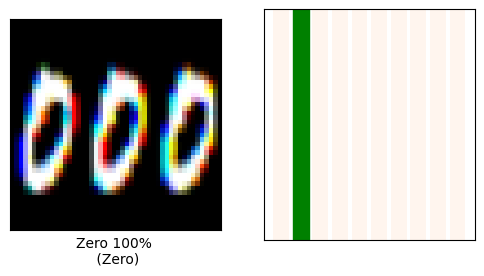

In [ ]:


# Prediction of individual images taken from internet

# call the function

# defining parameters to pass to function
i=random.randrange(1, 10000) # image number 12. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
# we are passing "val_images_Original" just to show original image instead of "val_images"
# which is preprocessed as VGG16 process and used for prediction.
plot_image(i,predictions, val_image_label, val_images_Original)
plt.subplot(1,2,2)
plot_value_array(i, predictions, val_image_label)
plt.show()



Classification of using Transfer Learning (VGG16)

Predicted, Percentage, (Original)



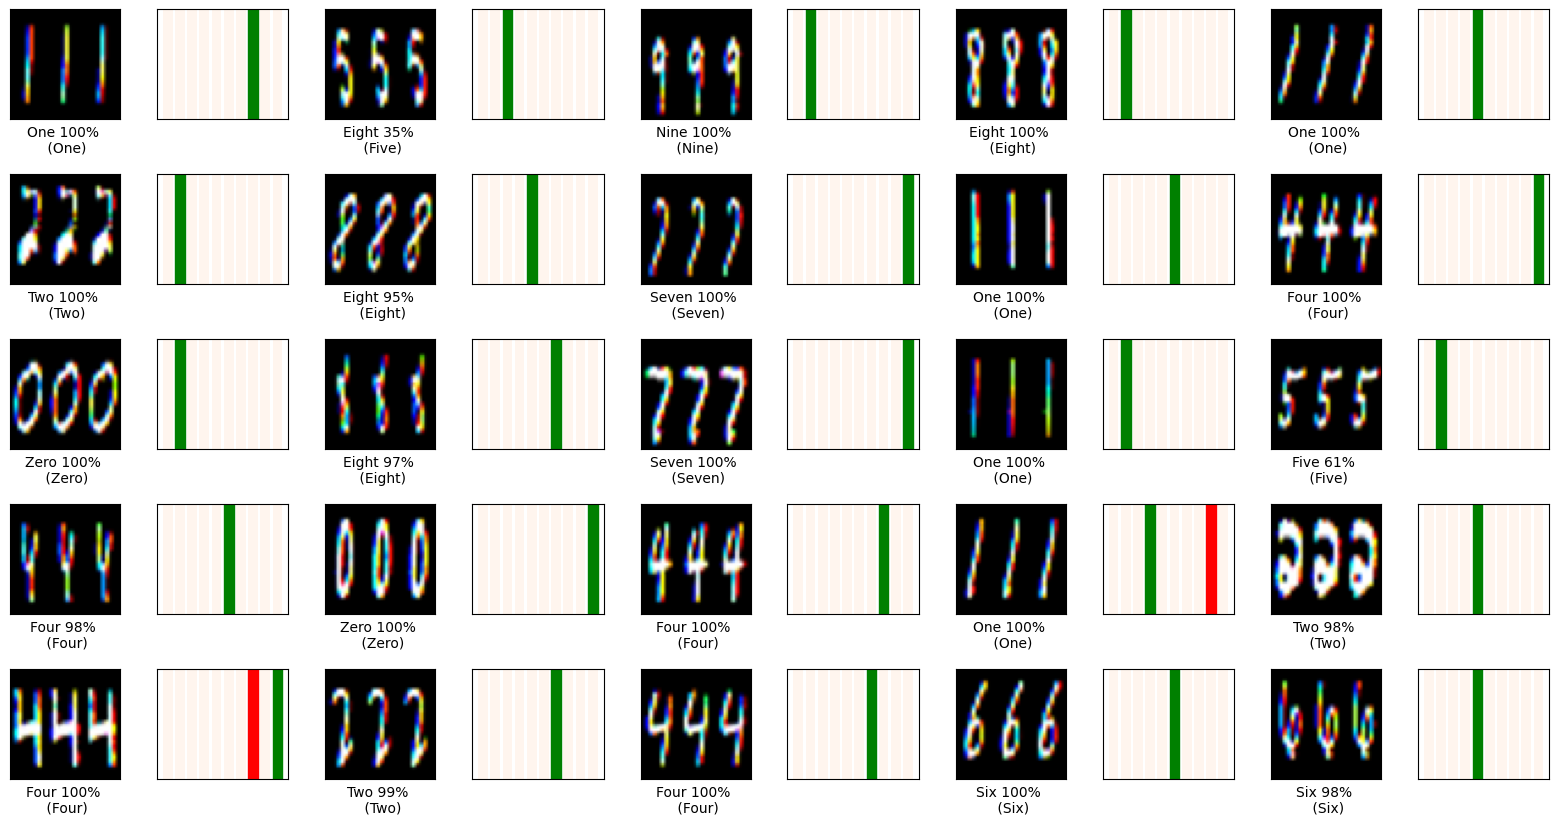

In [ ]:
# Declaring variables
num_rows=5
num_cols=5
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))

print("Classification of using Transfer Learning (VGG16)\n")
print("Predicted, Percentage, (Original)\n")

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    ii=random.randrange(1,10000)
    # we are passing "val_images_Original" just to show original image instead of "val_images"
    # which is preprocessed as VGG16 process and used for prediction.
    plot_image(ii,predictions, val_image_label, val_images_Original)

    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(i, predictions, val_image_label)
plt.subplots_adjust(hspace=0.5)
plt.show()

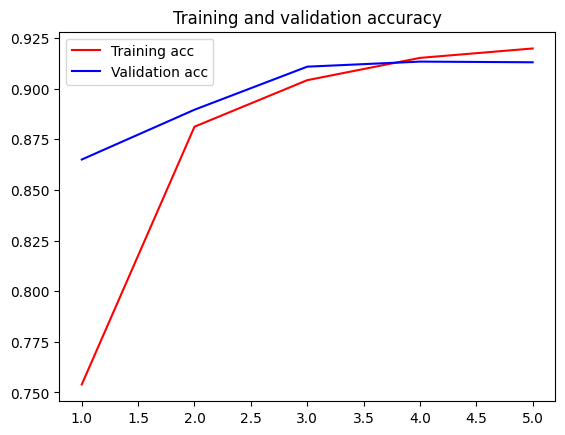

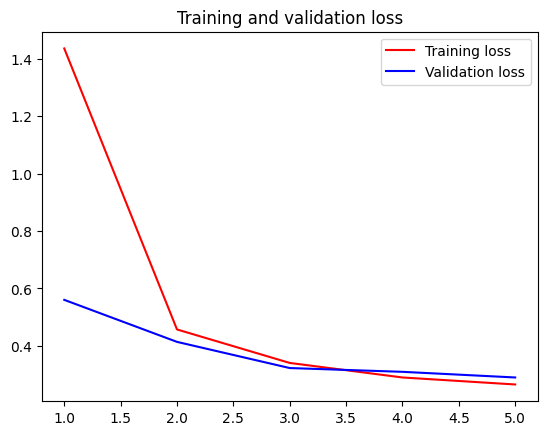

In [ ]:
# plot the loss and accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [ ]:


model.save('best_model1.h5')

